**LOADING PACKAGES**

In [1]:
import pandas as pd
from scripts import GetData, SentimentPrediction, Visualization, Preprocessing, GraphAnalysis
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import numpy as np
from operator import itemgetter
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",None)

**COLLECT TWEETS AND EXPLORATION**

- GET DATA

In [2]:
path = "Data/"
df = GetData(path).retrieve_tweets()

## Keep tweets related to Covid since January 2020
df = df[(df["date"]>="2020-01-01") & (df["lang"].isin(["en","fr"]))]
df.head(2)

index        Account               id_str           created_at  \
199  1759500      MSPS_Togo  1214940845368999936  2020-01-08 16:04:04   
200  3385396  health_malawi  1215225121021054977  2020-01-09 10:53:41   

                                                                                                                                        full_text  \
199            Middle East respiratory syndrome coronavirus (MERS-CoV) – The United Arab Emirates https://t.co/KRZDK2jzfS https://t.co/TGHWAWUSXP   
200  RT @WHOWPRO: Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @…   

              source  truncated  in_reply_to_status_id  \
199          dlvr.it      False                    NaN   
200  Twitter Web App      False                    NaN   

     in_reply_to_status_id_str in_reply_to_screen_name  retweet_count  \
199                        NaN                     NaN              0   
200                        NaN                     NaN            177   

     retweeted lang  original_tweet_id  \
199      False   en                NaN   
200      False   en       1.215167e+18   

                                                                                                                                                                                                                                                                               original_text  \
199                                                                                                                                                                                                                                                                                      NaN   
200  Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak.  https://t.co/0zR6iZWrcm (1/7)   

       Pays       date  
199    Togo 2020-01-08  
200  Malawi 2020-01-09

- EXPLORATION AND VIZUALISATION

In [3]:
## Shape of our data
df.shape

(128459, 17)

In [4]:
## Date range of our data
print("Début d'émission des tweets sur le covid : {debut} | Fin de collecte de ces tweets : {fin}".\
      format(debut=df["date"].min(),fin=df["date"].max()))

Début d'émission des tweets sur le covid : 2020-01-08 00:00:00 | Fin de collecte de ces tweets : 2021-02-24 00:00:00


Text(0.5, 0, 'Date')

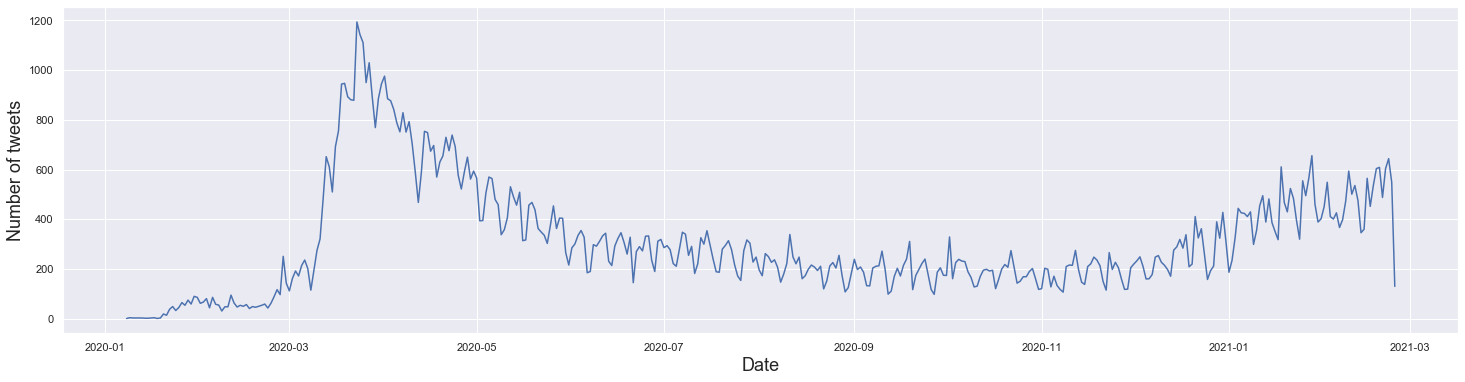

In [5]:
## Tweet's number evolution
fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(df['date'].value_counts().sort_index())
plt.ylabel("Number of tweets",fontsize=18)
plt.xlabel("Date",fontsize=18)

- PREPROCESSING

In [6]:
## Remove stop words
lst_words = ["rt","amp"]
preproc = Preprocessing(df, lst_words)

df = preproc.remove_some_words()
df.head(2)

index        Account               id_str           created_at  \
199  1759500      MSPS_Togo  1214940845368999936  2020-01-08 16:04:04   
200  3385396  health_malawi  1215225121021054977  2020-01-09 10:53:41   

                                                                                          full_text  \
199                     middle east respiratory syndrome coronavirus merscov – united arab emirates   
200  chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus   

              source  truncated  in_reply_to_status_id  \
199          dlvr.it      False                    NaN   
200  Twitter Web App      False                    NaN   

     in_reply_to_status_id_str in_reply_to_screen_name  retweet_count  \
199                        NaN                     NaN              0   
200                        NaN                     NaN            177   

     retweeted lang  original_tweet_id  \
199      False   en                NaN   
200      False   en       1.215167e+18   

                                                                                                                                                                                                                                                                               original_text  \
199                                                                                                                                                                                                                                                                                      NaN   
200  Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak.  https://t.co/0zR6iZWrcm (1/7)   

       Pays       date  
199    Togo 2020-01-08  
200  Malawi 2020-01-09

In [ ]:
## Translate french tweets to english with google translate API

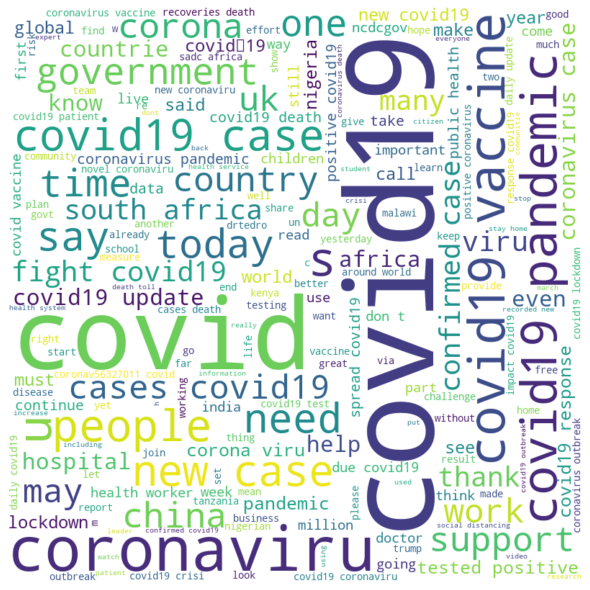

In [7]:
## Word Cloud for English corpus
dataviz = Visualization(df,"en")
dataviz.word_cloud()

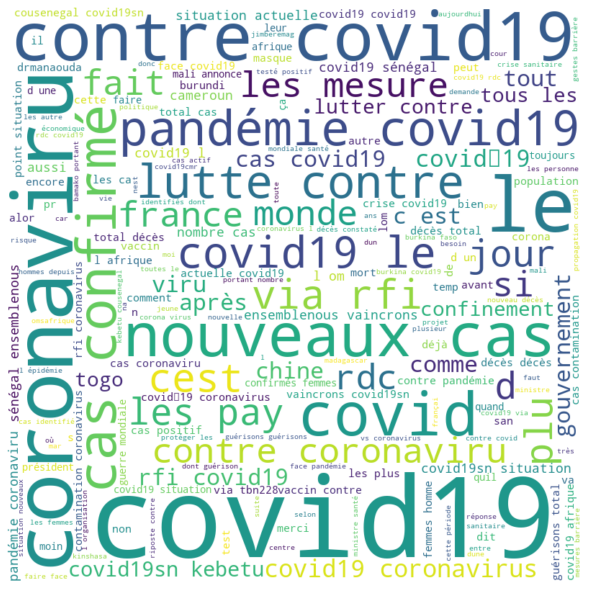

In [8]:
## Word Cloud for French corpus
dataviz = Visualization(df,"fr")
dataviz.word_cloud()

**Preprocessing**

**SENTIMENT PREDICTION**

- VADER

In [7]:
df_english = df[df["lang"]=="en"][["Pays","id_str","date","full_text"]]

In [8]:
df_english = SentimentPrediction(df_english).vader_prediction()
df_english.head()

Pays               id_str       date  \
199                            Togo  1214940845368999936 2020-01-08   
200                          Malawi  1215225121021054977 2020-01-09   
201              OMS Ouest Africain  1215373449285308417 2020-01-09   
202              OMS Ouest Africain  1215243578873696256 2020-01-09   
204  Republic Democratique du Congo  1215528646540087297 2020-01-10   

                                                                                                    full_text  \
199                               middle east respiratory syndrome coronavirus merscov – united arab emirates   
200            chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus   
201  protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoroughl…   
202             took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…   
204      protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoro…   

     compound sentiment  
199    0.4215  Positive  
200    0.6124  Positive  
201   -0.1531  Negative  
202   -0.2924  Negative  
204   -0.1531  Negative

In [9]:
df_english["sentiment"].value_counts()

Positive    40114
Neutral     31074
Negative    28044
Name: sentiment, dtype: int64

Text(0.5, 0, 'Date')

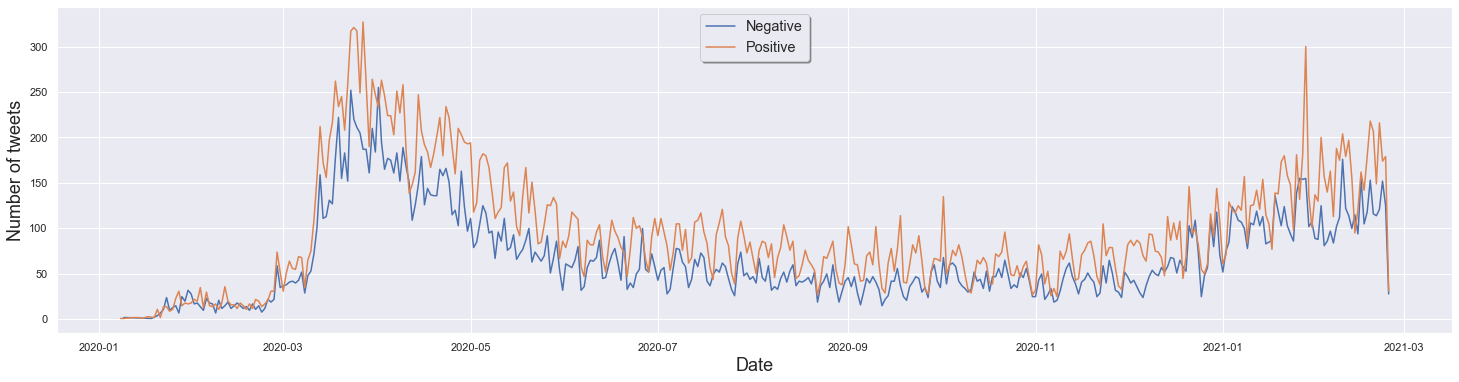

In [10]:
## Evolution temporelle de la polarité
fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(df_english[df_english["sentiment"]=="Negative"]['date'].value_counts().sort_index(),label='Negative')
plt.plot(df_english[df_english["sentiment"]=="Positive"]['date'].value_counts().sort_index(),label='Positive')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.ylabel("Number of tweets",fontsize=18)
plt.xlabel("Date",fontsize=18)

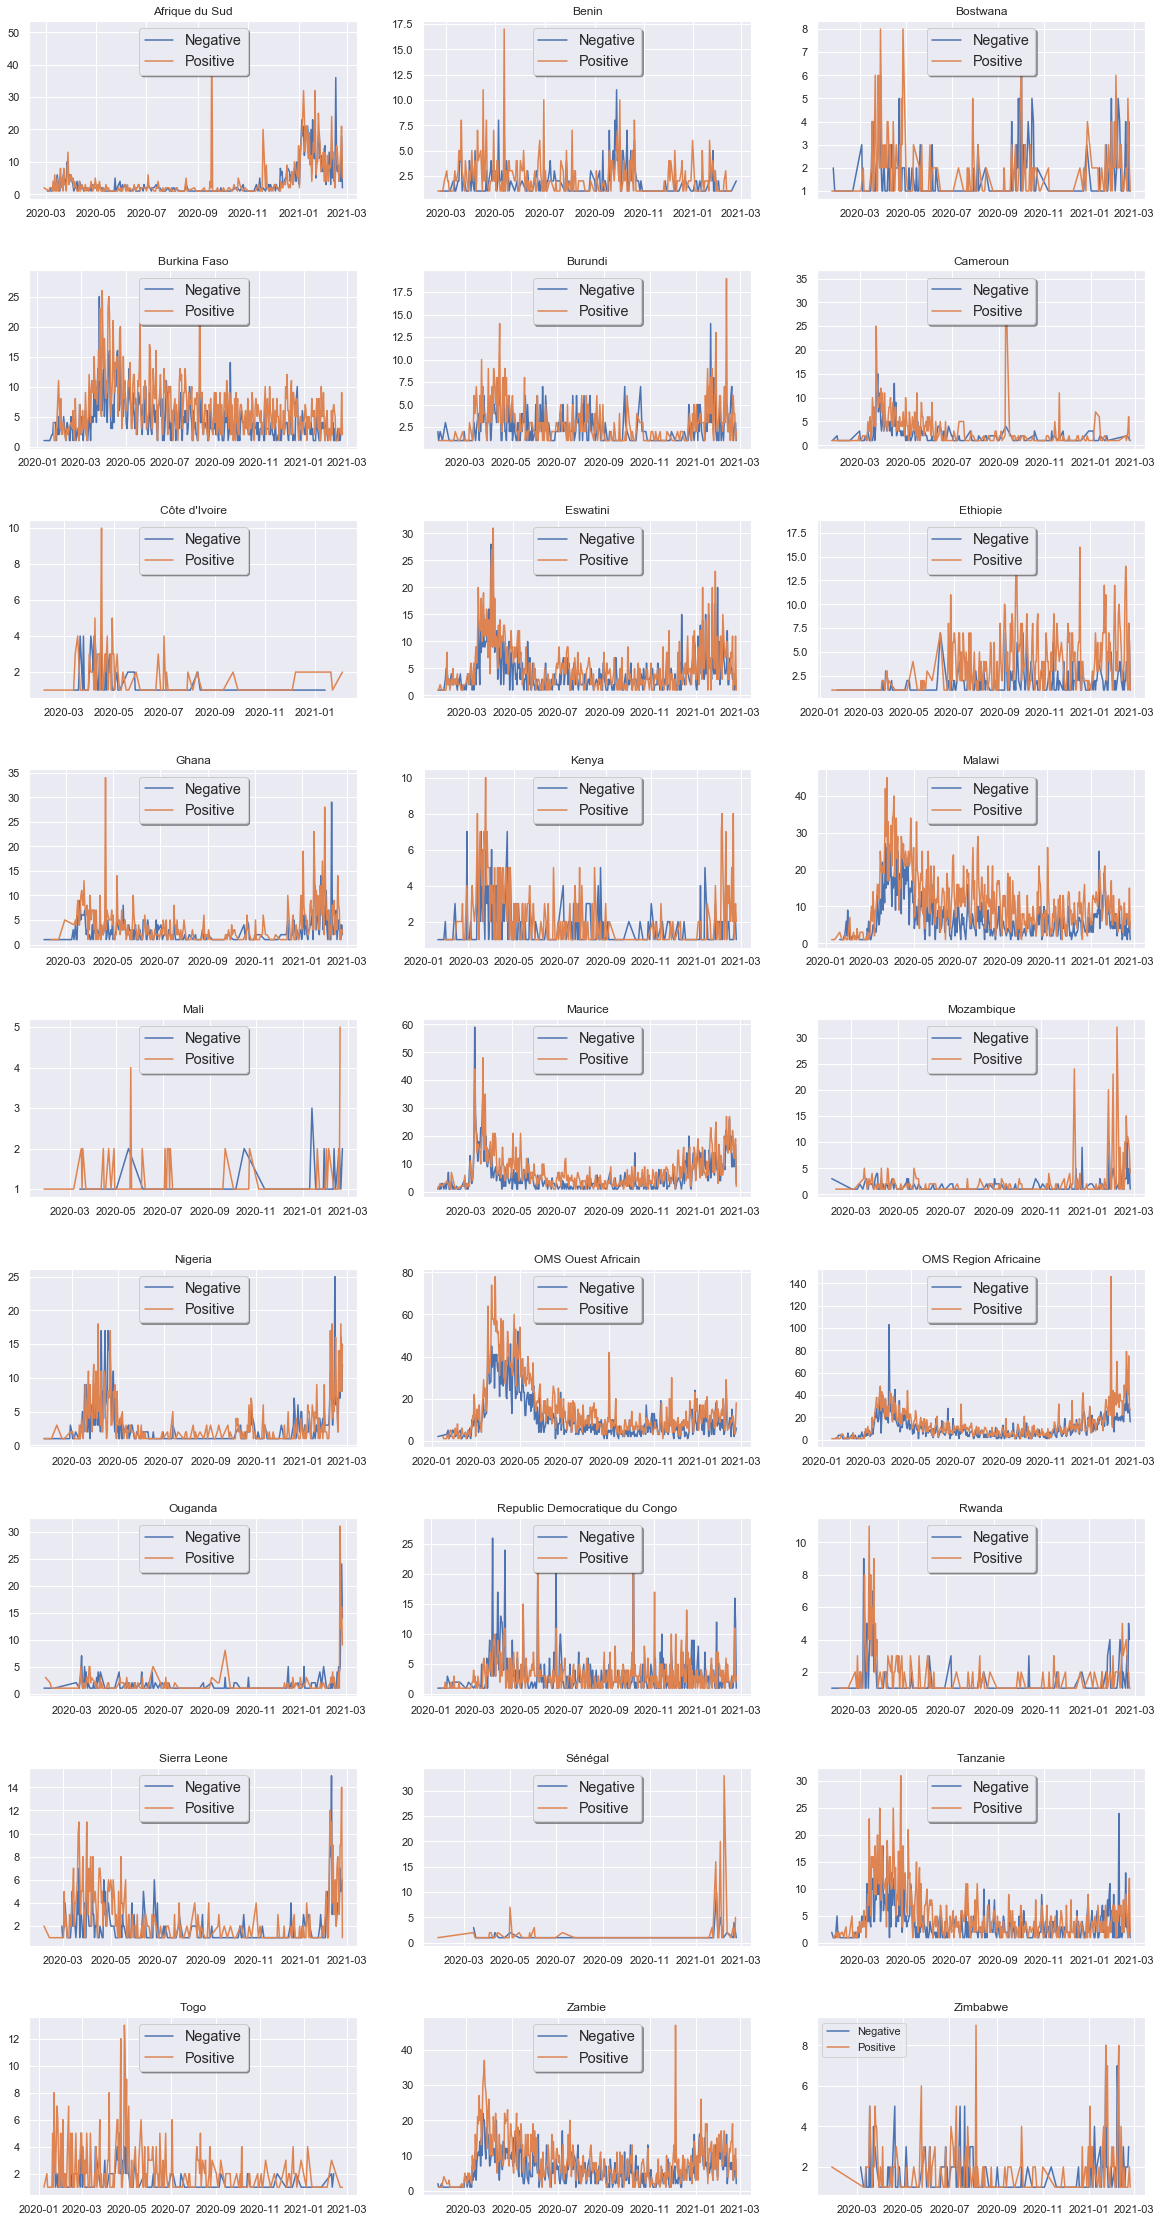

In [11]:
grouped = df_english.groupby("Pays")
rowlength = grouped.ngroups/9
fig, axs = plt.subplots(figsize=(20,40), nrows=9, ncols = int(np.ceil(rowlength)),gridspec_kw=dict(hspace=0.4))
targets = zip(grouped.groups.keys(), axs.flatten())

for i, (key, ax) in enumerate(targets):
    df_grouped = grouped.get_group(key)
    ax.plot(df_grouped[df_grouped["sentiment"]=="Negative"]['date'].value_counts().sort_index(),label='Negative')
    ax.plot(df_grouped[df_grouped["sentiment"]=="Positive"]['date'].value_counts().sort_index(),label='Positive')
    ax.set_title("%s"%key)
    ax.legend(loc='upper center', shadow=True, fontsize='x-large')
ax.legend()

In [13]:
positive_tweets, negative_tweets = df_english[df_english["sentiment"]=="Positive"], \
                                    df_english[df_english["sentiment"]=="Negative"]

In [14]:
## Print some tweets classified positive
positive_tweets.head(20)

Pays               id_str       date  \
199                            Togo  1214940845368999936 2020-01-08   
200                          Malawi  1215225121021054977 2020-01-09   
208                            Togo  1216371960374071296 2020-01-12   
210                            Togo  1216249779518308352 2020-01-12   
211                          Malawi  1216588658926661633 2020-01-13   
213                            Togo  1216747327819522049 2020-01-13   
215            OMS Region Africaine  1217166151039496195 2020-01-14   
216                            Togo  1217160852823932930 2020-01-14   
219  Republic Democratique du Congo  1217349225010229248 2020-01-15   
222              OMS Ouest Africain  1217918199527813125 2020-01-16   
223              OMS Ouest Africain  1217806127620030464 2020-01-16   
224                            Togo  1218248761790484480 2020-01-17   
227                        Ethiopie  1218312396621713413 2020-01-17   
228              OMS Ouest Africain  1218243091934650370 2020-01-17   
231  Republic Democratique du Congo  1218758776288755713 2020-01-19   
232                            Togo  1218979543559680001 2020-01-19   
234  Republic Democratique du Congo  1219100432447860736 2020-01-20   
235  Republic Democratique du Congo  1219100678842306560 2020-01-20   
236            OMS Region Africaine  1219217381723000832 2020-01-20   
240                          Malawi  1219237719630589952 2020-01-20   

                                                                                                                                full_text  \
199                                                           middle east respiratory syndrome coronavirus merscov – united arab emirates   
200                                        chinese authorities made preliminary determination cause pneumonia wuhan novel new coronavirus   
208  breaking received genetic sequences novel coronavirus 2019ncov chinese authorities expect made publicly available soon possible tphs   
210                                                  interim guidance information issued countries manage novel coronavirus continue upd…   
211                                         breaking received genetic sequences novel coronavirus 2019ncov chinese authorities expect th…   
213                                         genetic sequences novel coronavirus 2019ncov allow countries develop specific diagnostic kit…   
215                        traveler thailand treated novel coronavirus detected thermal surveillance airport upon arrival china according   
216                                                                                                  novel coronavirus – thailand exchina   
219                                                                             philippines representative morning talk novel coronavirus   
222                                                        response 2019 novel coronavirus 2019ncov working develop test detect virus wi…   
223                                       working officials thailand🇹🇭 china🇨🇳 following reports confirmation novel coronavirus 2019ncov…   
224                                                                                                  novel coronavirus – thailand exchina   
227                                          size wuhan outbreak novel coronavirus estimated three cases detected outside china likely 1…   
228                                           uk disease modeling group estimates 4050 reported cases wuhan novel coronavirus know tip t…   
231                                     china announced 17 new cases ncov wuhan brings total number confirmed cases novel coronavirus ch…   
232                                    boundaries hold dear arent respected infectious diseases recent emergence novel coronavirus wuhan…   
234                                              china🇨🇳 reported 139 new cases novel coronavirus 2019ncov wuhan beijing shenzhen past t…   
2

In [15]:
## Print some tweets classified negative
negative_tweets.head(20)

Pays               id_str       date  \
201              OMS Ouest Africain  1215373449285308417 2020-01-09   
202              OMS Ouest Africain  1215243578873696256 2020-01-09   
204  Republic Democratique du Congo  1215528646540087297 2020-01-10   
206                    Burkina Faso  1215424946308046849 2020-01-10   
229                    Burkina Faso  1218681396149063682 2020-01-18   
237                           Kenya  1219350607364050944 2020-01-20   
238            OMS Region Africaine  1219357529853059072 2020-01-20   
239                          Malawi  1219322130778804225 2020-01-20   
244            OMS Region Africaine  1219318170844127237 2020-01-20   
255              OMS Ouest Africain  1219445452279554052 2020-01-21   
257            OMS Region Africaine  1219700623924514816 2020-01-21   
260                          Malawi  1219726350455648258 2020-01-21   
261              OMS Ouest Africain  1219476842341699585 2020-01-21   
262              OMS Ouest Africain  1219551603885248512 2020-01-21   
264                    Burkina Faso  1219759876596850688 2020-01-21   
266                    Burkina Faso  1219521245533872128 2020-01-21   
268            OMS Region Africaine  1220072751031111681 2020-01-22   
269            OMS Region Africaine  1220081439905140736 2020-01-22   
273                        Eswatini  1220052556388491265 2020-01-22   
274                            Togo  1220050466505134080 2020-01-22   

                                                                                                                                                                                                full_text  \
201                                                                                              protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoroughl…   
202                                                                                                         took earlier tweet wasnt clear enough confirming chinese authorities think new coronavirus —…   
204                                                                                                  protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoro…   
206                                                                                              protect reduce risk coronavirus infection 👏🏽hand hygiene 🤧cover mouth nose coughing sneezing 🥩thoroughl…   
229                                                                                                                1 authorities wuhan report finding 17 new cases ncov2019 3 suffering severe illness 2…   
237                                                                                             convening emergency committee ascertain whether novel coronavirus 2019ncov constitutes public health eme…   
238                                                                                                                  called emergency committee meeting determine ongoing coronavirus outbreak china con…   
239                                                                                             emergency committee novel coronavirus 2019ncov ascertain whether outbreak constitutes public health emer…   
244                                                                         new convene meeting emergency committee discuss whether coronavirus outbreak china constitutes global public health emergency   
255                                                                                                                breaking directorgeneral convene emergency committee novel coronavirus 2019ncov inter…   
257                                                                              cdc confirms first us case wuhan coronavirus man snohomish county washington risk general public considered low ncov2019   
260                                                                            

**GRAPH MINING**

In [3]:
df.head(2)

index        Account               id_str           created_at  \
199  1759500      MSPS_Togo  1214940845368999936  2020-01-08 16:04:04   
200  3385396  health_malawi  1215225121021054977  2020-01-09 10:53:41   

                                                                                                                                        full_text  \
199            Middle East respiratory syndrome coronavirus (MERS-CoV) – The United Arab Emirates https://t.co/KRZDK2jzfS https://t.co/TGHWAWUSXP   
200  RT @WHOWPRO: Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @…   

              source  truncated  in_reply_to_status_id  \
199          dlvr.it      False                    NaN   
200  Twitter Web App      False                    NaN   

     in_reply_to_status_id_str in_reply_to_screen_name  retweet_count  \
199                        NaN                     NaN              0   
200                        NaN                     NaN            177   

     retweeted lang  original_tweet_id  \
199      False   en                NaN   
200      False   en       1.215167e+18   

                                                                                                                                                                                                                                                                               original_text  \
199                                                                                                                                                                                                                                                                                      NaN   
200  Chinese authorities have made a preliminary determination of the cause of #pneumonia in Wuhan as a novel (new) #coronavirus. @WHO continues to monitor the situation closely and is ready to support #China to investigate and respond to this outbreak.  https://t.co/0zR6iZWrcm (1/7)   

       Pays       date  
199    Togo 2020-01-08  
200  Malawi 2020-01-09

In [4]:
print("Number of tweets which have been retweeted: ",len(set(df["original_tweet_id"].dropna())))

Number of tweets which have been retweeted:  61672


In [14]:
## tabulation of number of retweets of each tweet
count_retweets = df["original_tweet_id"].dropna().value_counts()\
                                        .rename_axis('original_tweet_id')\
                                        .reset_index(name='counts')
count_retweets.head()

original_tweet_id  counts
0       1.239582e+18      20
1       1.309143e+18      17
2       1.252729e+18      17
3       1.253768e+18      16
4       1.239617e+18      15

Text(0.5, 1.0, 'Number of retweets per tweet')

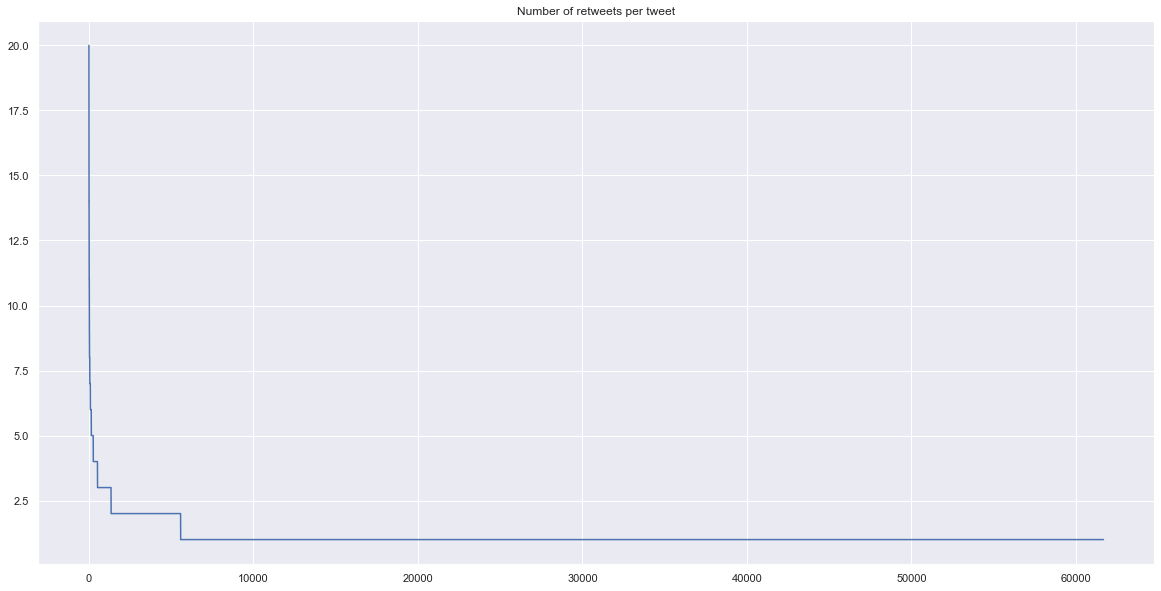

In [15]:
plt.figure(figsize = (20,10))
plt.plot(count_retweets["counts"])
plt.title("Number of retweets per tweet")

In [20]:
stat_retweets = df[["original_tweet_id","original_text"]].dropna().drop_duplicates()
stat_retweets = stat_retweets.merge(count_retweets, on=['original_tweet_id'], how='left')\
                             .sort_values(by="counts",ascending=False)
stat_retweets.head(50)

original_tweet_id  \
4261        1.239582e+18   
19391       1.252729e+18   
41742       1.309143e+18   
20524       1.253768e+18   
53971       1.351731e+18   
4193        1.239617e+18   
20793       1.254183e+18   
56632       1.356590e+18   
9604        1.243497e+18   
20468       1.253819e+18   
19771       1.253088e+18   
14533       1.247616e+18   
9154        1.243190e+18   
5456        1.240671e+18   
5251        1.240324e+18   
10141       1.243905e+18   
20458       1.253599e+18   
3952        1.239263e+18   
20055       1.253455e+18   
19034       1.252360e+18   
60735       1.363233e+18   
9635        1.243639e+18   
10196       1.243941e+18   
52590       1.349241e+18   
10172       1.244017e+18   
14485       1.247623e+18   
21374       1.254902e+18   
6425        1.241337e+18   
18463       1.251628e+18   
7123        1.241721e+18   
18760       1.252009e+18   
7950        1.242468e+18   
8607        1.242941e+18   
3157        1.238404e+18   
43166       1.314212e+18   
16928       1.250182e+18   
19228       1.252274e+18   
22168       1.255635e+18   
35881       1.286942e+18   
7727        1.242210e+18   
53755       1.351653e+18   
10194       1.243972e+18   
7060        1.241436e+18   
53768       1.351518e+18   
15742       1.248579e+18   
11926       1.245113e+18   
23577       1.257191e+18   
6907        1.241768e+18   
24739       1.259193e+18   
44276       1.319283e+18   

                                                                                                                                                                                                                                                                                                                      original_text  \
4261                                                    Africa can be one step ahead of the coronavirus. To each of the 54 African countries, we will donate 20,000 test kits, 100,000 masks and 1,000 medical use protective suits and face shields. Thank you @PMEthiopia @AbiyAhmedAli for your support. https://t.co/6oKptVCjNx   
19391                         117 new cases of #COVID19 have been reported;\n\n59 in Lagos\n29 in FCT\n14 in Kano\n6 in Borno\n4 in Katsina\n3 in Ogun\n1 in Rivers\n1 in Bauchi\n\nAs at 11:25 pm 21st April there are 782 confirmed cases of #COVID19 reported in Nigeria.\n\nDischarged: 197\nDeaths: 25 https://t.co/i6UaoqWHiu   
41742                                                                                                                                                                                            I tested negative to Covid yesterday and positive today. No symptoms what so ever. Covid had the courage to challenge me. Bad idea   
20524      L’Afrique agit &amp; se protège contre le #Covid19. Merci au Président @Macky_Sall pour nos échanges et sa confiance. Le #Senegal félicite #Madagascar pour le remède traditionnel amélioré Covid-Organics &amp; lance une 1ère commande. \nVive l’Afrique et vive sa richesse naturelle ! 🇲🇬 🇸🇳 https://t.co/reRkE9I9vj   
53971                                                        Tonight, in Washington, D.C. and across the nation, we came together to honor the over 400,000 Americans we’ve lost to COVID-19. The last year has tested us in unimaginable ways, but now it’s time we begin to heal and overcome — together. https://t.co/DuWhN1xjNO   
4193                                        This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how I’m doing 👊🏾👊🏾 No panic. https://t.co/Lg7HVMZglZ   
20793                87 new cases of #COVID19 have been reported;\n\n33 in Lagos\n18 in Borno\n12 in Osun\n9 in Katsina\n4 in Kano\n4 in Ekiti\n3 in Edo\n3 in Bauchi\n1 in Imo\n\nAs at 11:55 pm 25th April there are 1182 confirmed cases of #COVID19 reported in Nigeria.\n\nDischarged: 222\n

In [25]:
## Check retweets spread on different countries
for retweet_id in list(set(df["original_tweet_id"].dropna())):
    different_countries = set(df[df["original_tweet_id"]==retweet_id]["Pays"])
    if df[df["original_tweet_id"]==retweet_id].shape[0]>1 and len(different_countries) > 1:
        print("Tweet Id: ",retweet_id)
        print("Tweet: ",set(df[df["original_tweet_id"]==retweet_id]["original_text"]))
        print("Countries: ",different_countries)
        print("*"*50)
    

Tweet Id:  1.247622996002472e+18
Tweet:  {'Sixteen new cases of #COVID19 have been reported in Nigeria: 10 in Lagos, 2 in the FCT, 2 in Oyo, 1 in Delta and 1 in Katsina\n\nAs at 09:30 pm 7th April there are 254 confirmed cases of #COVID19 reported in Nigeria. Fourty-four have been discharged with six deaths https://t.co/UlDvzM3cUZ'}
Countries:  {'OMS Region Africaine', 'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.345950048018985e+18
Tweet:  {'Chamisa slams ‘irrational’ lockdown, Mohadi vows strict enforcement\n\n🔴 The MDC leader wants a lockdown targeting Covid hotspots\n🔴 As acting president promises strict enforcement of national restrictions\nhttps://t.co/sA5QFeYFYJ'}
Countries:  {'Eswatini', 'Zimbabwe'}
**************************************************
Tweet Id:  1.2544611237530542e+18
Tweet:  {'NEW: a lot of data on reported Covid deaths is highly suspect, so we’ve been looking into excess mortality — how many more people t

Tweet:  {'Hey @CityofCT is there an easier way to report Covid non-compliance?\nA whatsapp line where you can send the images/video?\nC3 line to include non-compliance? https://t.co/6oPbjTI4lk'}
Countries:  {'Eswatini', 'Bostwana'}
**************************************************
Tweet Id:  1.3612124196332708e+18
Tweet:  {'For all COVID-19 news, follow our coverage here ➡️ https://t.co/PVdXk8NyWJ https://t.co/xjhLNFG77U'}
Countries:  {'Zambie', 'Afrique du Sud'}
**************************************************
Tweet Id:  1.2376388587009843e+18
Tweet:  {'COVID-19 helping people realise that some meetings can be emails.'}
Countries:  {'Burkina Faso', 'Malawi'}
**************************************************
Tweet Id:  1.2852101549847101e+18
Tweet:  {'Oxford’s Covid-19 vaccine produces a good immune response, reveals new study. \nTeams at @VaccineTrials and @OxfordVacGroup have found there were no safety concerns, and the vaccine stimulated strong immune responses: https://t.co/krq

Tweet Id:  1.2436801630549156e+18
Tweet:  {'BREAKING: We’re launching a test that can detect COVID-19 in as little as 5 minutes—bringing rapid testing to the frontlines. https://t.co/LqnRpPpqMM https://t.co/W8jyN2az8G'}
Countries:  {'Afrique du Sud', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2654252345529057e+18
Tweet:  {'“Governments in Southeast Asia and across the world have been using COVID-19 as an excuse to widen their powers and to implement lasting and potentially dangerous restrictions on human rights.” Tracking infections means we need #RightsNow. https://t.co/6PNeve9yL2'}
Countries:  {'Zambie', 'Burundi'}
**************************************************
Tweet Id:  1.3482572694404588e+18
Tweet:  {'Covid-19- Plus de 300 cas sévères sous oxygène, le Directeur du Samu National alerte."Ce qui est à noter, Pour les cas graves qui arrivent en réanimation, parfois dans plus de 400% ce n’étaient même pas des cas suivis à domicile. #cov19s

Tweet Id:  1.3437833176954266e+18
Tweet:  {"L'Espagne va tenir un registre des personnes refusant de se faire vacciner contre le Covid-19 https://t.co/xMChQVFjjR https://t.co/6RkHWPqAAt"}
Countries:  {'OMS Ouest Africain', 'Benin'}
**************************************************
Tweet Id:  1.2610365120425083e+18
Tweet:  {"DG @nsanzimanasabin received a mobile lab made of 2 testing machines to boost #COVID19 testing capacity in #Rwanda. The German-funded lab was handed over by @jumuiya Vice SG Mr Christophe Bazivamo with @GermanyinRwanda's Amb. Thomas Kurz in attendance. Capacity: 600 tests/day https://t.co/kXrZm0Shot"}
Countries:  {'Burundi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2437652102565683e+18
Tweet:  {'ITALY: 101-year old man who was born during the Spanish Flu pandemic has recovered from a coronavirus infection'}
Countries:  {'Tanzanie', 'Malawi', 'Rwanda'}
**************************************************
Tweet Id:  1.241767

Tweet Id:  1.2714465624645059e+18
Tweet:  {'#COVID19 accelerating in Africa - #WAHO DG @sokolo12  on eNCA TV of South Africa to share @ecowas_cedeao response. \n@Ecowas_cdc \n👇\nhttps://t.co/h7doHahq6R'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2408771504687432e+18
Tweet:  {'For the first time, #China has reported no domestic #COVID19 cases yesterday. This is an amazing achievement, which gives us all reassurance that the #coronavirus can be beaten. \nhttps://t.co/py3Ka2cbLK'}
Countries:  {'OMS Region Africaine', 'Kenya', 'OMS Ouest Africain', 'Sierra Leone'}
**************************************************
Tweet Id:  1.2533344960043704e+18
Tweet:  {'COVID-19: reminder of risk of serious side effects with chloroquine and hydroxychloroquine | European Medicines Agency https://t.co/wwcS41zwKr via @EMA_News'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3050687050140508e+18
Tw

Tweet Id:  1.2275147185224212e+18
Tweet:  {'As of today, #Africa is yet to record a positive case of #COVID_19 on the continent. All persons under investigation have been tested &amp; cleared. Get all the facts you need to know from @AfricaCDC &amp; @WHO.\n#AfricaPrepares #FactsNotFear #2019n_CoV https://t.co/FqrfeZu58c'}
Countries:  {'Togo', 'Burkina Faso', 'Malawi'}
**************************************************
Tweet Id:  1.341140182720983e+18
Tweet:  {'After Several tests, Gov @AWTambuwal tests negative to Covid-19, resumes official functions on Tuesday. https://t.co/tVlEB4zpvP'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2623136600279368e+18
Tweet:  {'"Are official confirmed cases and fatalities counts good enough to study the #COVID19 pandemic dynamics?" New paper with great team. https://t.co/ELaWQFUxKf'}
Countries:  {'Zambie', 'Eswatini'}
**************************************************
Tweet Id:  1.244181

Tweet Id:  1.25418980174345e+18
Tweet:  {"Le seuil symbolique des 200.000 morts par le #coronavirus dans le monde a été franchi samedi soir, dont près de 90% en Europe et aux Etats-Unis, pays ayant enregistré le plus de morts (54.133), suivis par l'Italie (26.384), l'Espagne (22.902) et la France (22.614). https://t.co/OMiRoegJbx"}
Countries:  {'Burkina Faso', "Côte d'Ivoire"}
**************************************************
Tweet Id:  1.356226838603948e+18
Tweet:  {'[BREAKING NEWS] Plane carrying covid19 vaccine arrives. For more on this tune in to #DStv403 https://t.co/YDQVetNxaz'}
Countries:  {'Afrique du Sud', 'Eswatini', 'Rwanda'}
**************************************************
Tweet Id:  1.3434760083102065e+18
Tweet:  {'"It\'s not just #COVID19 that is killing people,\nit\'s underprivilege,\nit\'s lack of access,\nit\'s years of living with health conditions that haven\'t been properly managed because of the colour of your skin, or your ethnicity, or your social group"- @DrM

Tweet Id:  1.2724657550832845e+18
Tweet:  {'Over 240,000 confirmed #COVID19 cases on the African continent - with more than 109,900 recoveries &amp; 6,400 deaths. View country figures &amp; more with the WHO African Region COVID-19 Dashboard: https://t.co/V0fkK8dYTg https://t.co/6pFOz99yrv'}
Countries:  {'Cameroun', 'Burkina Faso'}
**************************************************
Tweet Id:  1.253490305875075e+18
Tweet:  {'Sorry to burst bubbles, but it’s hot and sunny all year round in Singapore and we’re still getting hammered by the coronavirus pandemic. The heat has not saved us.'}
Countries:  {'Afrique du Sud', 'Eswatini'}
**************************************************
Tweet Id:  1.2540184536498831e+18
Tweet:  {'Why South Asia has 20% of world’s population but less than 2% of Covid-19 cases (so far)?\n\nhttps://t.co/eDf8SQcIET via @ThePrintIndia @sandygrains @swagata_y'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.263095458

Tweet Id:  1.241460900244095e+18
Tweet:  {'*IMPORTANT*\nAll healthcare workers more than 28 weeks pregnant should stop direct patient contact. #COVID19\n\nhttps://t.co/BcWDn9s409'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2547421601313219e+18
Tweet:  {'Today was the 4th interaction with CMs. We continued discussions on COVID-19 containing strategy as well as aspects relating to increased usage of technology, reforms and more. https://t.co/xB7pnjmh2P'}
Countries:  {'Maurice', 'Eswatini'}
**************************************************
Tweet Id:  1.220729512608129e+18
Tweet:  {'#coronarovirus #FAQ\n\nWhat are the common signs of #coronavirus infection? https://t.co/0zlBN9MkO7'}
Countries:  {'Cameroun', 'OMS Region Africaine'}
**************************************************
Tweet Id:  1.2193184497024287e+18
Tweet:  {'The Emergency Committee on the novel #coronavirus (2019-nCoV) will ascertain whether the outbreak constitutes a 

Tweet Id:  1.2431475338887414e+18
Tweet:  {'Total of 1808 confirmed #COVID19 cases in @WHO Africa Region. \n\nWithin the past 24 hours, there have been 216 new confirmed cases across 15 countries in the Region, with 2 new countries reporting cases 🇬🇼#GuineaBissau &amp; 🇲🇱#Mali. https://t.co/jVBWrjzIrF'}
Countries:  {'OMS Region Africaine', 'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3447696211995648e+18
Tweet:  {'2020 was not an easy year, there’s no doubt about it. No one can be indifferent to the pain and suffering that COVID-19 brought upon the world.\nBut now it’s time to bounce back and show that, together, we can make a difference.\nHappy New Year!🙏🏽❤️ https://t.co/7n1i0ARjiK'}
Countries:  {'Nigeria', 'Kenya', 'Ghana', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.241750780392231e+18
Tweet:  {'🔊 The Minister of Health of #Mozambique has just confirmed the first case of #COVID19 in the coun

Tweet Id:  1.3620365785756058e+18
Tweet:  {'I know COVID-19 can be scary, but I want every kid out there to know things are going to be okay. https://t.co/wZIxHeNAFa'}
Countries:  {'OMS Region Africaine', 'Maurice', 'Sierra Leone'}
**************************************************
Tweet Id:  1.247241845387735e+18
Tweet:  {'UK Prime Minister Boris Johnson, who has coronavirus, has been taken to intensive care https://t.co/hQClxR7lRt'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain', 'Ghana'}
**************************************************
Tweet Id:  1.3429915098140836e+18
Tweet:  {'One per thousand Americans have now died from covid-19.\nHow does that compare with 12 other select countries with &gt;20 million population? https://t.co/lMXLSbOlN1'}
Countries:  {'OMS Region Africaine', 'Republic Democratique du Congo'}
**************************************************
Tweet Id:  1.254094963790549e+18
Tweet:  {'It is easy to forget what a huge threat malaria remains for all o

Tweet Id:  1.362096040854356e+18
Tweet:  {'The Johnson &amp; Johnson vaccine is 100% effective in protecting vaccinated people against #COVID-related death. If all #HealthWorkers are vaccinated, #COVID deaths are therefore unlikely among such workers. https://t.co/rWncQrI9Qg'}
Countries:  {'Zimbabwe', 'Bostwana'}
**************************************************
Tweet Id:  1.2414360385198367e+18
Tweet:  {'My dad died two days ago from COVID19. He died alone because the hospital restricted all visitors in order to contain the outbreak. My deepest regret was not saying bye to him when I brought him to the hospital. I thought it was going to be a “Take care, see you back home.” 1/3'}
Countries:  {'Maurice', 'Burundi', 'Malawi', 'Cameroun', 'Zambie', 'OMS Region Africaine', 'Ghana'}
**************************************************
Tweet Id:  1.292955347913769e+18
Tweet:  {'High-touch surfaces are more likely to contain bacteria and viruses such as COVID-19. Clean and disinfect surfaces 

Tweet Id:  1.2958203579207885e+18
Tweet:  {'Over 1.1 million confirmed #COVID19 cases on the African continent - with more than 846,000 recoveries &amp; more than 25,000 deaths cumulatively. \n\nView country figures &amp; more with the WHO African Region COVID-19 Dashboard: https://t.co/V0fkK8dYTg https://t.co/4OdKCBeBdt'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.243918869204476e+18
Tweet:  {'8 new cases of #COVID19 have been reported in Nigeria, 7 in Lagos and 1 in Benue State.\n\nAs at 04:00 pm 28th March there are 89 confirmed cases of #COVID19 reported in Nigeria with 1 death. https://t.co/kbL7yIMiLs'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3623540698311188e+18
Tweet:  {'Her name is Sister Siboniso Mlilo. she administered the first COVID-19 vaccine in Zimbabw on the Honorable VP CDGN Chiwenga!\n\nShe is a history maker

Tweet Id:  1.2750074347261788e+18
Tweet:  {'#COVID19sn \nSituation actuelle du #COVID19 au Sénégal.\nEnsemble,nous VAINCRONS \n#COVID19sn #kebetu https://t.co/rdoBNcN2RU'}
Countries:  {'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2515879364261028e+18
Tweet:  {'No more funding will be provided until the World Health Organization’s failures and cover-ups during the Coronavirus pandemic are investigated. https://t.co/Mi6QcsDDd9'}
Countries:  {'Mozambique', 'Afrique du Sud', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.337334093709783e+18
Tweet:  {'No vaccines in history has been developed as rapidly as for #COVID19 vaccines. The scientific community has set a new standard for vaccine development. Now the international community must set a new standard for access and fair distribution #ACTogether'}
Countries:  {'OMS Region Africaine', 'Malawi', 'OMS Ouest Africain'}
*********************************

Tweet Id:  1.3627116221717094e+18
Tweet:  {"I dropped out of Uni in my finals, school wasnt for me, started a clothing line, was doing well till covid hit in 2020, I've always been talented, but music was too risky, now it's all I have, all my savings went into this, I need love and support. Pls RT &amp; tell someone about me https://t.co/Dw4xaUSaYh"}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3182798033641677e+18
Tweet:  {'#Iran: The People’s Mojahedin Organization of Iran (PMOI/#MEK) announced on Monday, October 19, 2020, that the #Coronavirus fatalities in 458 cities had exceeded 127,100. #COVID19 \nhttps://t.co/XByG5Z6gn2 https://t.co/qL0PrmP9OU'}
Countries:  {'Benin', 'Bostwana'}
**************************************************
Tweet Id:  1.2558909180052644e+18
Tweet:  {"#COVID19 could undermine progress made towards achieving the @UN's sustainable development goals (SDGs), based on new @UNFPA research.\n\nFind o

Tweet Id:  1.3107192442970112e+18
Tweet:  {'[Recap] Hong Kong democrats Eddie Chu and Ray Chan to leave the legislature\n\nhttps://t.co/Sis2kAw9vy #HongKong #COVID #COVID19 #COVID_19 #coronavirusoutbreak #coronavirus #China'}
Countries:  {'Bostwana', 'Benin'}
**************************************************
Tweet Id:  1.2682843486897603e+18
Tweet:  {'Are you interested in learning more about @USAIDGH @MTaPS_Program #PharmaSystems work? From multi-country #COVID19 response to #Pharmacovigilance for a new #HIV drug in #Mozambique, &amp; an innovative hub in the #Philippines?\n \nRead about all this &amp; more👉https://t.co/DVau1tqjZ8 https://t.co/RFfH6Yh3wR'}
Countries:  {'Burkina Faso', 'Malawi'}
**************************************************
Tweet Id:  1.2558681264509215e+18
Tweet:  {'Q: Is there an association between exposure to air pollution and covid-19 infection? \nA: Yes.\n(is it causal? - harder to answer)\n\nhttps://t.co/WS1xh1Gxq4'}
Countries:  {'Zambie', 'Malawi'}
******

Tweet Id:  1.316821366755205e+18
Tweet:  {'Scientific consensus on the COVID-19 pandemic: we need to act now https://t.co/sEvk6Oi6Tu'}
Countries:  {'Republic Democratique du Congo', 'Zambie'}
**************************************************
Tweet Id:  1.2208998359239762e+18
Tweet:  {'BREAKING: Doctor who was treating coronavirus in China has died of the virus'}
Countries:  {'Nigeria', 'Malawi'}
**************************************************
Tweet Id:  1.228543073287721e+18
Tweet:  {'The total number of #COVID19 cases reported from mainland China 🇨🇳 to date is 66,492\n\nThe total includes 16,522 cases that were clinically diagnosed in Hubei Province.\n\nThe figures include 11,053 severe cases and 1,523 people who have died.\n\n#coronavirus #COVID19 https://t.co/yNoDCoZQEN'}
Countries:  {'Togo', 'Eswatini'}
**************************************************
Tweet Id:  1.3483808848989676e+18
Tweet:  {'VATICAN: The personal doctor of Pope Francis, Dr Fabrizio Soccorsi, has died due t

Tweet Id:  1.306262137346515e+18
Tweet:  {'Yesterday, I was feeling weak and consulted my Doctor. During the course of my check up, I have been tested COVID 19 positive. I am at present doing well with the blessings and good wishes of all. I have isolated myself.'}
Countries:  {'Maurice', 'Eswatini'}
**************************************************
Tweet Id:  1.2434615045964227e+18
Tweet:  {'Les premières étapes de notre recherche sur le COVID19.\n\n27 février : \n8h30 : Réception du premier prélèvement positif.\n11h30 : Confirmation du résultat par rtPCR (13CT).\n\n28 février : premières images en microscopie électronique (balayage + transmission).\n...(1/2). https://t.co/azA3AwcXFu'}
Countries:  {'Cameroun', 'Mali'}
**************************************************
Tweet Id:  1.2444163799792804e+18
Tweet:  {'My sister has #Covid_19. She’s 7 months pregnant. Will you pray for her?'}
Countries:  {'Ghana', 'OMS Ouest Africain'}
**************************************************
Tweet

Tweet Id:  1.3346284724640072e+18
Tweet:  {'iPads stockpiled for ICU end of life goodbyes... was not something Steve Jobs foresaw. \n\n(HT to @roto_tudor) #COVID19 https://t.co/hFNokN0Ogj'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.344766948819792e+18
Tweet:  {'Authorities have arrested a suburban Milwaukee pharmacist suspected of deliberately ruining hundreds of doses of coronavirus vaccine by removing them from refrigeration for two nights. https://t.co/lFf91jVBGW'}
Countries:  {'OMS Region Africaine', 'Republic Democratique du Congo'}
**************************************************
Tweet Id:  1.2432460239436636e+18
Tweet:  {'The international response will require funding for @CEPIVaccines’s development of a COVID-19 vaccine and for @Gavi. Thanks to @BorisJohnson and the UK for this vital commitment. https://t.co/PQqAJqdpfe'}
Countries:  {'Mozambique', 'Burkina Faso'}
********************************

Tweet Id:  1.3619895532597617e+18
Tweet:  {"BREAKING: Zanzibar Vice President Seif Sharif Hamad dies after his party said he was hospitalized with COVID-19, even though Tanzania's government has claimed to be virus-free since April 2020"}
Countries:  {'Republic Democratique du Congo', 'Afrique du Sud'}
**************************************************
Tweet Id:  1.2798344867970376e+18
Tweet:  {'Coronavirus: l’Afrique résiste mieux que prévu et oblige les “experts” de l’OMS à revoir leurs\xa0copies https://t.co/9F1VRRfQNF'}
Countries:  {'Mali', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3359403272539382e+18
Tweet:  {'Devastating to announce the demise of 28 yr old Dr. Stephen Mogusu who has succumbed to COVID-19 complications At the time of his death he had not received his salary for 5 months,had no insurance &amp; his young family left with no compensation.Too steep a price for Patriotism. https://t.co/hl8WNYxxeH'}
Countries:  {'Tanzanie', '

Tweet Id:  1.2783776129734124e+18
Tweet:  {'Lutte contre la #COVID19 : le Conseil de sécurité des Nations Unies🇺🇳 exige une cessation immédiate et mondiale des hostilités.\n\n#Coronavirus\n@UNPeacekeeping\n@UNPeacebuilding\n@UNDPPA\nhttps://t.co/ZSFvFj2cgy'}
Countries:  {'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.240208925762388e+18
Tweet:  {'BREAKING: Katsina records first suspected coronavirus case https://t.co/3lXFkMAgy5 https://t.co/qnSBtUcEd9'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.359770282412548e+18
Tweet:  {'La doyenne des Français fête ses 117\xa0ans après avoir vaincu le Covid-19 https://t.co/LudUjKCURK https://t.co/fa1WFI4sS4'}
Countries:  {'Republic Democratique du Congo', 'Burundi'}
**************************************************
Tweet Id:  1.3628285012761108e+18
Tweet:  {'Having an orgasm at least 3 times a week cuts in half your risks of coron

Tweet Id:  1.3189157103079793e+18
Tweet:  {'So the Oba of Lagos was hoarding covid-19 palliatives'}
Countries:  {'Nigeria', 'Ghana'}
**************************************************
Tweet Id:  1.3530260461704438e+18
Tweet:  {'#COVID19 update in Africa as of 23/01/2021 at 6 PM EAT. Cases -- 3,393,591., Deaths – 83,901 and Recoveries --2,854,275. \nMore at https://t.co/7xkrFH4etK\n#AfricaResponds \n#TestTraceTreat \n#FactsNotFear https://t.co/QkIpa5CwvR'}
Countries:  {'OMS Region Africaine', 'Burundi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2384234720843407e+18
Tweet:  {'BREAKING NEWS | South Africa confirms 8 more cases of #coronavirus, bringing the total to 24 . #COVID_19 #coronavirusInSA #sabcnews https://t.co/UpVxWEGzMj'}
Countries:  {'Malawi', 'Eswatini'}
**************************************************
Tweet Id:  1.2425008409270313e+18
Tweet:  {'Hi fam. I want to play a part in helping our government with the fight against CORONAVI

Tweet:  {'Africa CDC hosts the first training of trainers TOT on strengthening point of entry PoE surveillance for #COVID19. The 3 day meeting in partnership with @WHOAFRO @MOH_KENYA ICAO will train participants from 15 priority countries. @laktarr001 https://t.co/X1UVMiTAOt'}
Countries:  {'Togo', 'Malawi', 'Eswatini'}
**************************************************
Tweet Id:  1.2284035188071383e+18
Tweet:  {'.@WHO confirms first #COVID19 case in Egypt, after official confirmation by Egyptian Ministry of Health &amp; Population. @WHOEgypt &amp; @mohp_gov_eg are collaborating closely in outbreak investigation &amp; response actions.\n# of confirmed cases in @WHOEMRO Region to date:\nUAE: 8\nEgypt: 1 https://t.co/00PFDrWzdD'}
Countries:  {'OMS Region Africaine', 'Togo'}
**************************************************
Tweet Id:  1.321834609022296e+18
Tweet:  {'"This is a call for increased support for data use during COVID-19, focusing on the immediate needs related to the pandemic 

Tweet Id:  1.2428606432602153e+18
Tweet:  {'🔊Our Centre for Virus Research is at the heart of #COVID19 🦠research in the UK. From rapidly sequencing the whole virus genome to working closely with #NHS, the @CVRinfo is performing vitally important research.\n#unisupport \nFind out more ➡️ https://t.co/7i9ccWLACe https://t.co/rDcsY5iu8U'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2564568174729298e+18
Tweet:  {'Pray for the safety of the Congolese Doctor, Dr. Jerome Munyagi who discovered the Coronavirus medicine being used in Madagascar. #Madagascar https://t.co/4rYs6hrW8a'}
Countries:  {'Eswatini', 'Rwanda'}
**************************************************
Tweet Id:  1.3466839527912325e+18
Tweet:  {'Can you please  retweet this until she gets bursary #BeitbridgeBorder #university #Ramaphosa #Covid19InSA #DJSBU #GirlsTalkZA https://t.co/wPK1v9vR0B'}
Countries:  {'Afrique du Sud', 'Eswatini'}
*****************************************

Tweet Id:  1.240296590084096e+18
Tweet:  {'NEW: Number of confirmed coronavirus cases in Germany has reached 10,000.'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.259072215502512e+18
Tweet:  {'#COVID19 #ECOWAS DAILY UPDATE for May 8, 2020\n\n#StaySafe #PreventionActionsKey #Covid19Out https://t.co/vLr8CCXJyo'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.3526376312266465e+18
Tweet:  {'COVID-19 is spreading and it is real. Fam please, please masks on, sanitize your hands and don’t wander around. We have lot’s of Castles to catch up to. https://t.co/XNBnConzaS'}
Countries:  {'Zambie', 'Zimbabwe'}
**************************************************
Tweet Id:  1.2515675930156073e+18
Tweet:  {'Mallam Abba Kyari, who died on 17th April, 2020, at the age of 67 from complications caused by the Coronavirus, was a true Nigerian patriot.'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
*****

Tweet Id:  1.3175068019701432e+18
Tweet:  {"Minister of Health Lizzie Nkosi's #COVID19 update on 17 October 2020:\n\nNew cases: 19\nTotal cases: 5765\n\nTotal recoveries: 5392 https://t.co/mPTLrKgT4m"}
Countries:  {'Bostwana', 'Benin'}
**************************************************
Tweet Id:  1.2921483181480264e+18
Tweet:  {'Just wanted to assure everyone that I’m doing well. I’m currently under medical observation &amp; my COVID-19 report is negative. With the help &amp; care of the doctors, nurses &amp; staff at Lilavati hospital, I should be home in a day or two. Thank you for your well wishes &amp; blessings 🙏'}
Countries:  {'Mozambique', 'Eswatini'}
**************************************************
Tweet Id:  1.2832816274902548e+18
Tweet:  {'🇫🇷 Pandémie de #coronavirus : Martine #Aubry est favorable à l’annulation de la grande braderie de #Lille prévue en septembre. « Je suis totalement d’accord avec la décision du #préfet (...) rien ne serrait pire qu’un immense cluster\xa0»

Tweet Id:  1.2272141672050852e+18
Tweet:  {'Looking for more information on #2019nCoV? I am moderating a panel today at the @AspenInstitute from noon to 1:15 pm EST. Star panel: Anthony Fauci, @DrNancyM_CDC, @RonaldKlain. If you’re in DC, come in person &amp; bring questions. Or watch online: https://t.co/w0mHq3BPjV'}
Countries:  {'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2619445484162785e+18
Tweet:  {'“It is more important than ever to replenish funding for Gavi to mitigate the potentially grievous impact of #COVID19 on immunization.” Thank you, @BIDInitiative and @PATHtweets. Interesting read on the urgent risks of disrupted immunisation services: https://t.co/AoR9ldIq88'}
Countries:  {'Tanzanie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2472257383292396e+18
Tweet:  {"With a ban on cars 2 combat Covid-19, a couple in the Ugandan lakeside city of Entebbe tied the knot, &amp; walked

Tweet Id:  1.3112321725278822e+18
Tweet:  {'#today H.E Amb. @BoscoBarege1 attended  a virtual meeting on the timing &amp; format of #UNEA5  in view of #COVID19. https://t.co/la5hs1jDlZ'}
Countries:  {'Burkina Faso', 'Burundi'}
**************************************************
Tweet Id:  1.262496538460336e+18
Tweet:  {'1) @RwandaHealth Minister @DrDanielNgamije: The situation of COVID-19 is a wakeup call to the World to realize that it is inevitable to invest in our health sectors than never before. #WHA73\n@RwandaMFA @RwandaHealth @MCRwakazina @WHO @WHORwanda https://t.co/krgRlzbHUl'}
Countries:  {'OMS Region Africaine', 'Bostwana'}
**************************************************
Tweet Id:  1.282650032546689e+18
Tweet:  {'Clinical trials of Russian anti-#Covid_19 vaccine have been successfully completed in Sechenov First Moscow State Medical University. The tests showed vaccine’s full safety. The volunteers are to be dismissed from hospital on 20 July https://t.co/37rynkhle8'}
Coun

Tweet:  {'Covid-19 mortality rate in Malawi spiking at alarming levels. So far this morning, TWO cabinet ministers have succumbed to the pandemic. @health_malawi @dadakim @Fromagehomme @danbanik @EllenMLust'}
Countries:  {'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2534553233289052e+18
Tweet:  {'108 new cases of #COVID19 have been reported;\n\n78 in Lagos\n14 in FCT\n5 in Ogun\n4 in Gombe\n3 Borno\n2 in Akwa Ibom\n1 in Kwara\n1 in Plateau \n\nAs at 11:30 pm 23rd April there are 981 confirmed cases of #COVID19 reported in Nigeria.\n\nDischarged: 197\nDeaths: 31\n\n#TakeResponsibility https://t.co/cq7STlnHGJ'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3259276586775306e+18
Tweet:  {'94 new cases of #COVID19Nigeria;\n\nLagos-50\nFCT-24\nKwara-9\nEdo-4\nKaduna-3\nOndo-2\nPlateau-2\n\n64,184 confirmed\n60,069 discharged\n1,158 deaths https://t.co/GRT4acYS75'}
C

Tweet Id:  1.3619966892220785e+18
Tweet:  {'Today, 17 Feb 2021, the *first health care worker* in South Africa got a Covid-19 vaccine (through a study) in Khayelitsha,   a place where the first ARV study clinic was set up and a place of immense civil society and human rights activism. \n\n#Vaccines\n#NoCovidMonopolies\n\n😪🙏🏾🖤'}
Countries:  {'OMS Region Africaine', 'Eswatini'}
**************************************************
Tweet Id:  1.298651672130941e+18
Tweet:  {'I was really impressed that the COVE study Phase 3 for Moderna COVID vaccine has appointed a diversity and inclusion advisory board that is tracking diversity in vaccine trial enrolment on a week by week basis! https://t.co/KWzrleNMaY'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2425028309189796e+18
Tweet:  {'2 new cases of #COVID19 have been confirmed in Nigeria: 1 in FCT and 1 in Bauchi\n\nThe cases have travel history to Germany and the UK.\n\nAs at 06:25 pm on 24th

Tweet Id:  1.240752063488897e+18
Tweet:  {'#COVID19Africa briefing moderated by @wef earlier today. This is one of the biggest health challenges Africa has faced in a generation. Adopting approaches which are adaptable to the African context is key to containing the spread. https://t.co/iPejLseLhL'}
Countries:  {'Burkina Faso', 'Malawi'}
**************************************************
Tweet Id:  1.2632338903927153e+18
Tweet:  {'Successful exchange with @DrTedros who commends #Madagascar’s efforts in the fight against #Covid19.\n@WHO will sign a confidentiality clause on the formulation of the #CovidOrganics and will support the clinical observations process in #Africa. https://t.co/SCZZRDKheV'}
Countries:  {'OMS Region Africaine', 'Cameroun'}
**************************************************
Tweet Id:  1.2650296676454605e+18
Tweet:  {'Le Sénégal enregistre son trente-sixième décès lié à la Covid19sn. #COVID__19 #kebetu https://t.co/S6osFrAQA6'}
Countries:  {'Sénégal', 'Malawi'}
***

Tweet Id:  1.2407552435640975e+18
Tweet:  {'Today, 4 new cases of #COVID19 were confirmed in Nigeria; a total of 12 confirmed cases in Nigeria\n\nWe urge Nigerians to remain calm. Please adhere to recommendations by health authorities including handwashing, self isolation for returning travelers and others https://t.co/WMznwl2UyA'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2714287790349722e+18
Tweet:  {'Need to renew your vehicle licence?\n\nBut couldn’t renew due to the national COVID-19 lockdown in March, April and May?\n \n📢It can wait! \n\n📢You have until 29 August 2020 to do so. \n\nSome vehicle licencing offices are open but running on a skeleton staff. https://t.co/5H0lzMZiaX'}
Countries:  {'Eswatini', 'Bostwana'}
**************************************************
Tweet Id:  1.244334265401258e+18
Tweet:  {'Help prevent the spread of #COVID19. Avoid close contact with people who are sick, wash hands often for at least 20 

Tweet Id:  1.344154332032344e+18
Tweet:  {'BREAKING: MADAGASCAR QUITS WORLD HEALTH ORGANISATION OVER COVID-19 SCANDAL\n\nMadagascar President, Andry Ranoelina, has removed his country from the World Health Organisation. He angrily said:\n\n"Europe created organizations with the desire for Africans to remain dependent on them.'}
Countries:  {'Tanzanie', 'Afrique du Sud', 'Eswatini'}
**************************************************
Tweet Id:  1.2460604099557827e+18
Tweet:  {"UN support for Mauritania's national response to end with #COVID19: @unfpamauritania Rep, providing #coronavirus prevention kits to the Minister of family affairs @MASEF68949550 to support women prisoners and victims of gender based violences.\n@Atayeshe @mabinguengom1 https://t.co/hSI4W8p6d7"}
Countries:  {'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2495820039656284e+18
Tweet:  {"WHO continues to emphasize the importance of handwashing during the #COVID19 p

Tweet Id:  1.2407517661043917e+18
Tweet:  {'Désormais on a un numéro simple 3535\n #Burkina #Covid19 #coronavirus https://t.co/6Q4d6eWE0g'}
Countries:  {'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.243956778007769e+18
Tweet:  {'#COVID19 aura vraisemblablement de graves conséquences économiques et sociales pour les pays #IDA, où vivent 1/4 de la population mondiale et 2/3 des personnes en situation de pauvreté extrême. Déclaration commune .@Banquemondiale  et @FMIactualites \nhttps://t.co/zfkj8qXpEC'}
Countries:  {'OMS Region Africaine', 'Togo'}
**************************************************
Tweet Id:  1.2468161049216737e+18
Tweet:  {'I need your help pls!\nNeed to know country-specific guidance on how long to self isolate if u have #COVID19-like symptoms (not tested), so eg Switzerland says min 10d and 48 hrs after symptoms, UK says 7d from start of symptoms, WHO says 14d after symptoms gone. Your country?\nRT'}
Countries:  {

Tweet Id:  1.3119381178726195e+18
Tweet:  {'My best wishes to President Trump and the First Lady. Hope they both have a speedy recovery from coronavirus.'}
Countries:  {'Benin', 'Bostwana'}
**************************************************
Tweet Id:  1.3113509480365752e+18
Tweet:  {'We started this work well before #COVID19 but the findings &amp; recommendations have been reinforced by the COVID experience. Very proud of this work lead by @DrMishalK &amp; @udnore in collaboration with @NCDCgov @CHGlobalHealth @NIH_Pakistan @EPHIEthiopia #IHR_Strengthening @PHE_uk https://t.co/EsSOYgFprq'}
Countries:  {'Zambie', 'Nigeria'}
**************************************************
Tweet Id:  1.3525415010337546e+18
Tweet:  {'Portez systématiquement vos masques et respectez les gestes barrières.\nLa vitesse de la diffusion du virus Covid-19 est préoccupante.On compte de+ en +de malades et de morts. Avec des structures sanitaires saturées, des professionnels de la santé débordés au bord du burn-o

Tweet Id:  1.255936701333201e+18
Tweet:  {'📢#COVID19Nigeria UPDATE\n\nThe 18th #COVID19 testing lab has been activated at Bayero University, Kano; the second laboratory to be activated in the state\n\nWe remain committed to rapidly scaling up #COVID19 testing capacity in Nigeria, as outlined in the national testing strategy https://t.co/5rHs5RCjon'}
Countries:  {'Burkina Faso', 'OMS Ouest Africain', 'Nigeria'}
**************************************************
Tweet Id:  1.3175047912333885e+18
Tweet:  {"Guinea Bissau's president beating up his minister who squandered Covid1-9's funds 😂😂😂 #EndSars https://t.co/ZcOT3nRPrB"}
Countries:  {'Republic Democratique du Congo', 'Bostwana'}
**************************************************
Tweet Id:  1.2569473670577848e+18
Tweet:  {"#COVID19 | Depuis le début de la pandémie, restrictions &amp; sanctions s’accumulent contre de nombreux journalistes qui ne font que leur travail.\n\nL'ONU appelle les gouvernements à protéger les professionnels des 

Tweet Id:  1.2427690199015547e+18
Tweet:  {'BREAKING: Prince Charles tests positive for coronavirus https://t.co/xGnCpZyKJH https://t.co/h6dswvUFWq'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3472793395078717e+18
Tweet:  {'Sean Dyche believes footballers should be vaccinated in order to re-distribute the vast money spent on coronavirus testing each week in the Premier League back to the NHS'}
Countries:  {'Sierra Leone', 'Malawi'}
**************************************************
Tweet Id:  1.3203557441732485e+18
Tweet:  {"Dans le contexte des systèmes d'informations pilotés par l'Etat, GreenSI trouve que le lancement de #TousAntiCovid est déjà un succès digital. Explications ! https://t.co/GHV08fQLWE"}
Countries:  {'Tanzanie', 'Burundi'}
**************************************************
Tweet Id:  1.246763471904985e+18
Tweet:  {'Join the fight against Corona #DiyaJalayenWithIndiaNews https://t.co/NZiSE5

Tweet Id:  1.249246698108584e+18
Tweet:  {'Making the case for Africa and its people, @AfricaCDC Director speaks to the world via @CNN. #AfricaRespond #COVID19AFRICA #FactsNotFear https://t.co/0il2CxPEs0'}
Countries:  {'Burundi', 'Malawi'}
**************************************************
Tweet Id:  1.2525016603976008e+18
Tweet:  {"*STARTING SHORTLY*\nIf you have not yet registered to join the webinar: 'REPORTING ON #COVID19 IN SOUTHERN AFRICA’ please register here: https://t.co/WXYh5EfzwQ https://t.co/7p0NiF1edm"}
Countries:  {'OMS Region Africaine', 'Tanzanie'}
**************************************************
Tweet Id:  1.3519264809688023e+18
Tweet:  {'UK records new daily high of 1,820 Covid deaths, the highest number since the pandemic began https://t.co/TJi6DODAOw'}
Countries:  {'OMS Region Africaine', 'Malawi'}
**************************************************
Tweet Id:  1.2416475949773414e+18
Tweet:  {'Today we have the seen reality of  #COVID-19 CT Scans from @KenyaGovernor

Tweet Id:  1.3505258974769603e+18
Tweet:  {'As terrible as COVID is, climate and ecological breakdown will be worse. We must begin acting - really acting - to minimize the damage. Which means coordinating an end to the fossil fuel industry, for starters.'}
Countries:  {'Maurice', 'Afrique du Sud'}
**************************************************
Tweet Id:  1.251216765893456e+18
Tweet:  {'This is the best measure I’ve seen of quite how few #COVID19 tests the UK has done. It is an international league table of countries ranked by percentage of population tested, compiled by Julian Ozanne (who was on FT with me in another life). The UK comes 20th out of 20 https://t.co/pvJaMe3GH6'}
Countries:  {'OMS Region Africaine', 'Malawi'}
**************************************************
Tweet Id:  1.2452803572279255e+18
Tweet:  {'#TakeResponsibility\n\nPlease clean all surfaces like door handles, stair rails and tables frequently.\n\n#COVID19 can live on these surfaces and be contracted after to

Tweet Id:  1.2880922776975892e+18
Tweet:  {'COVID19 #ECOWAS DAILY UPDATE for July 27, 2020.\n#StaySafe #PreventionActionsKey #Covid19Out #WearYourMask https://t.co/gBoCvePFky'}
Countries:  {'Togo', 'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2264883139153306e+18
Tweet:  {'We must harness the power of science to bring the #2019nCoV outbreak under control. In support of rapid evidence-based action, @WHO is co-organising a global forum to accelerate research and innovation for the new coronavirus from 11-12 February in Geneva. https://t.co/NNd359dUdk'}
Countries:  {'Togo', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2246886218207928e+18
Tweet:  {'Q: How dangerous is the #2019nCoV? \nA: https://t.co/j6HsqP9iJb https://t.co/z5t8e1oA6S'}
Countries:  {'Tanzanie', 'Burkina Faso'}
**************************************************
Tweet Id:  1.246126486798635e+18
Tweet:  {'South Africa is aiming 

Tweet Id:  1.2403863367727636e+18
Tweet:  {'#Coronavirus\n\nLes pays doivent\n-ISOLER\n-TESTER\n-SOIGNER\n-TRACER\n\n🗨️ « S’ils ne le font pas, les chaînes de transmission peuvent se poursuivre à un faible niveau puis resurgir une fois que les mesures d’éloignement physique sont levées »\n \n@DrTedros de @WHO https://t.co/XKXf2mLNfs'}
Countries:  {'OMS Region Africaine', 'Sierra Leone'}
**************************************************
Tweet Id:  1.25301715695616e+18
Tweet:  {'Comment une entreprise doit-elle répondre au #Covid19 : qu’attend-on du privé en situation de crise sanitaire ? \nRendez-vous demain lors de notre live avec @LTAfrique à 15h GMT pour le savoir.\n\n#Riposteafricaine #ConnectLive #Economie https://t.co/L7EID7KSE5'}
Countries:  {'Cameroun', 'Togo'}
**************************************************
Tweet Id:  1.3537023314817925e+18
Tweet:  {"Our new report assesses the damage of the #COVID19 crisis and the numbers are grim. 8.8% of global working hours were lost la

Tweet Id:  1.361680882172629e+18
Tweet:  {'This Covid has more key changes than Beyoncé’s ‘Love on Top’ https://t.co/vaKL2CFyhG'}
Countries:  {'Ghana', 'Eswatini'}
**************************************************
Tweet Id:  1.319630203212206e+18
Tweet:  {'Conseil des ministres ce vendredi 23 octobre à Kosyam, sous la présidence de @rochkaborepf #BurkinaFaso #lwili #StopCOVID19 https://t.co/AJmIjx5CTH'}
Countries:  {'Mali', 'Burkina Faso'}
**************************************************
Tweet Id:  1.3278365364240425e+18
Tweet:  {'📍NEW: Chilling video of El Paso jail inmates hired to move bodies of #COVID19 deceased patients into mobile overflow morgues. Inmates wear full PPEs &amp; paid $2/hour. They’ve been doing this tough work since Monday, before El Paso increased to 10 mobile morgues. I cry for El Paso. https://t.co/KgQBpzD1mZ'}
Countries:  {'Republic Democratique du Congo', 'Zambie'}
**************************************************
Tweet Id:  1.3160464331544863e+18
Tweet:  

Tweet Id:  1.279685193792553e+18
Tweet:  {"A Zimbabwean entrepreneur in Africa's top tobacco producer launches the first local brand of hand-rolled cigars, defying #coronavirus and economic odds to light up manufacturing https://t.co/Kj8wgEREG6 https://t.co/BgyBvHfl2o"}
Countries:  {'Maurice', 'Malawi'}
**************************************************
Tweet Id:  1.2715185710137795e+18
Tweet:  {'We as South Africans demand the same urgency given to COVID19 by government to be directed to the slaughter of women in South Africa. It is a pandemic and the numbers are even worse. The same power used to ban cigarettes and alcohol will do.'}
Countries:  {'Zambie', 'Zimbabwe'}
**************************************************
Tweet Id:  1.3062240971987804e+18
Tweet:  {'La #Tchéquie aide la ville et région de #Kayes à l\'ouest du #Mali dans le cadre du projet #COVID Response", par l\'intermédiaire de l\'ONG #tchèque @people_in_need\n. La 1er partie de l\'aide a été remise le 7/9 à l\'aéroport

Tweet Id:  1.248511653681025e+18
Tweet:  {'Spoke today with Prime Minister of Nepal, Shri @kpsharmaoli. We discussed the prevailing situation due to COVID-19. I appreciate the determination of people of Nepal to fight this challenge. We stand in solidarity with Nepal in our common fight against COVID-19.'}
Countries:  {'Maurice', 'Eswatini'}
**************************************************
Tweet Id:  1.2513858801467802e+18
Tweet:  {'COVID-19: South-West govs agree on joint border closures\nhttps://t.co/rzcw87qynO'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3619790846712504e+18
Tweet:  {"Media houses are lined up in anticipation of the South Africa's first #COVID19 vaccine being administered today at the Khayelitsha District Hospital in Cape Town. https://t.co/hZxApXifsv"}
Countries:  {'Afrique du Sud', 'Eswatini'}
**************************************************
Tweet Id:  1.3435861190117376e+18
Tweet:  {'My Covid 

Tweet Id:  1.3032205025515725e+18
Tweet:  {'"If and when we have an effective #COVID19 vaccine, we must also use it effectively. \n\nI will repeat again: vaccine nationalism will prolong the pandemic, not shorten it"-@DrTedros \n\nhttps://t.co/m5DZuZU6ya'}
Countries:  {'OMS Region Africaine', 'Malawi'}
**************************************************
Tweet Id:  1.2521720414715658e+18
Tweet:  {'Our #MondayMotivation are Red Cross volunteers from #Tchad.\n\nAs part of their contribution to the containment of #COVID19, they have been providing meals for people in quarantine. https://t.co/5xlFLNW0dy'}
Countries:  {'OMS Region Africaine', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2453049036452782e+18
Tweet:  {'⚡️#Coronavirus latest updates - Wednesday 1 April https://t.co/pB6LuiglQD'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.290972668544594e+18
Tweet:  {'DG #WAHO, Prof @sokolo12 givi

Tweet Id:  1.3587402686279844e+18
Tweet:  {'75% of all #COVID19 vaccinations worldwide have been given in just 10 countries.\n\n@DrTedros of @WHO calls for #VaccineEquity to end the pandemic at @OECD\'s #ResilientTogether webinar. \n\n"Together we can make it happen." https://t.co/3pbZXTfX2W'}
Countries:  {'OMS Region Africaine', 'Togo'}
**************************************************
Tweet Id:  1.2841922762862428e+18
Tweet:  {"“Contact tracing helped end the Ebola outbreak in West Africa, and it can help end COVID-19,” says @NyenswahG, senior research associate in @JohnsHopkinsIH. Read Nyenswah's story and other #COVID19 real-time response stories in @JohnsHopkinsSPH magazine. \n\nhttps://t.co/qx8n8ISl8j"}
Countries:  {'Zambie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.265175912754172e+18
Tweet:  {"Rappel : Dépistage  gratuit  covid 19 pour population generale  à Yaoundé.Lieu  l'école  des infirmières/ Hopital central  tous les jours.Pri

Tweet Id:  1.243262488272986e+18
Tweet:  {"La quantité de fausses informations qui circule en ce moment sur le #COVID19 peut même te donner la maladie si tu n'y prends garde. Chacun veut avoir la primeur de la connerie ! 😠"}
Countries:  {'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2595259085468467e+18
Tweet:  {'#Fact: Anyone can contract #COVID19. \nLet’s be kind to each other and help stop the spread of coronavirus by following health advice. https://t.co/hRimSfgPrA'}
Countries:  {'Burundi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2434999459965542e+18
Tweet:  {"Wow! A huge thank you to the 100,000+ learners who have signed up to our free online #COVID19 course 🙏\n\nThis new virus will affect everyone. We all need to understand it for good #PublicHealth.\n\nThere's still time to register - spread the word! 👉 https://t.co/xe1SMIllYd https://t.co/u6O7Jwy59w"}
Countries:  {'Malawi', 'OM

Tweet Id:  1.2497773295109407e+18
Tweet:  {'Each government must assess their #COVID19 situation, while protecting all citizens, especially the most vulnerable. The way forward is solidarity: solidarity at the national level, and solidarity at the global level. Together!'}
Countries:  {'Tanzanie', 'Nigeria'}
**************************************************
Tweet Id:  1.2538193702010593e+18
Tweet:  {'114 new cases of #COVID19 have been reported;\n\n80 in Lagos\n21 in Gombe\n5 in FCT\n2 in Zamfara\n2 in Edo\n1 in Ogun\n1 in Oyo\n1 in Kaduna\n1 in Sokoto\n\nAs at 11:30 pm 24th April there are 1095 confirmed cases of #COVID19 reported in Nigeria.\n\nDischarged: 208\nDeaths: 32 https://t.co/NIDV1zTh9o'}
Countries:  {'OMS Region Africaine', 'Maurice', 'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2598120218660372e+18
Tweet:  {"3 best predictors of Covid-19 infection: loss of smell, skipped meals, fatigue. Cough is common but if often prese

Tweet Id:  1.2456660675249398e+18
Tweet:  {'COVID-19 in Africa: watch a joint media briefing with WHO and WEF https://t.co/hMY5krtRY2'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.312034602366587e+18
Tweet:  {'.@HealthZA’s #COVID19SA Ministerial Advisory Committee has a few new faces. Have a look at the revamped committee with this update to our resource page. https://t.co/pDgPDleJ9q'}
Countries:  {'Bostwana', 'Zimbabwe'}
**************************************************
Tweet Id:  1.3436278704643072e+18
Tweet:  {'Here are the new lockdown regulations🙏🙏🙏🙏 \n\nPLEASE HELP RETWEET TO SAFE A LIFE. ❤\n\n#coronavirussa level 3 #cyril Capetown https://t.co/iRId578xJH'}
Countries:  {'Afrique du Sud', 'Eswatini'}
**************************************************
Tweet Id:  1.263825724504445e+18
Tweet:  {'NEW Research—First human trial of #COVID19 vaccine finds it is safe and induces rapid immune response: finding from a dose-escalation

Tweet Id:  1.2199444370208727e+18
Tweet:  {'The International Health Regulations Emergency Committee on the new #coronavirus (2019-nCoV) convened by @DrTedros is currently ongoing.\n\nRead more about the Emergency Committee 👉https://t.co/Qtsxqkr7xi https://t.co/SfDBXfmWoh'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2416176311967293e+18
Tweet:  {'Dear All,\nIt is now important for all of us to remain calm and vigilant. If you develop #COVID19 like symptoms,Please do not crowd the health facilities. Isolate yourself in a room and call @MinofHealthUG on 0800-100-066 or 0800-203-033 and a health team will be sent to you.'}
Countries:  {'Maurice', 'Zambie'}
**************************************************
Tweet Id:  1.242096165706965e+18
Tweet:  {'Monday update for #Africa #COVID19\n🇩🇿201\n🇦🇴2\n🇧🇯2\n🇧🇫99\n🇨🇲56\n🇨🇻1\n🇨🇫4\n🇹🇩1\n🇨🇬4\n🇨🇮25\n🇨🇩30\n🇩🇯1\n🇪🇬327\n🇬🇶9\n🇪🇷1\n🇸🇿4\n🇪🇹11\n🇬🇦5\n🇬🇲2\n🇬🇭24\n🇬🇳2\n🇰🇪15\n🇱🇷3\n🇲🇬12\n🇲🇺28\n🇲🇷2\n🇲🇦134\n

Tweet Id:  1.3635029731759227e+18
Tweet:  {'New #COVID-19 cases&amp;deaths in #Rwanda continue to decline significantly after picking in January 2021. We are making progress, but new infections are still high and even one death is too much if we can prevent it. We can do better to slow the spread.more: https://t.co/ZjyUDUMojp https://t.co/K3ksBYDkW8'}
Countries:  {'Burundi', 'Rwanda'}
**************************************************
Tweet Id:  1.2406467393061274e+18
Tweet:  {'Breaking! #COVID19Lagos\n*️⃣19 suspected cases and contacts of the new cases announced yesterday were tested and 4 turned out positive for #COVID19:\n➡️A contact of the 3rd case that came from the UK (One of the new cases announced yesterday)\n@jidesanwoolu\n@drobafemihamzat https://t.co/O7u50KlbCc'}
Countries:  {'Togo', 'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2553324860596347e+18
Tweet:  {'#COVID19 deaths in NYC &lt;300 for past 2 days for 1st time i

Tweet Id:  1.301172646189699e+18
Tweet:  {"Six weeks ago, I heard there were kids getting Covid and not getting better. Like the adults we've been hearing about, they were long-haulers. At the time, I couldn't find a single article about it. So I decided to do it myself #LongCovidKids #longhaulers \nhttps://t.co/rHSce6RbWR"}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.340910405397459e+18
Tweet:  {"Urgent. Pour éviter une propagation de la nouvelle souche de coronavirus en provenance de l'Afrique du sud, l'Afrique centrale doit immédiatement suspendre les vols de Ethiopian airlines.."}
Countries:  {'Cameroun', 'Benin'}
**************************************************
Tweet Id:  1.2868974927858606e+18
Tweet:  {'Coronavirus outbreaks could be stopped if everyone used masks, washed their hands and kept apart from others, a new study finds https://t.co/JXcECiTnAf'}
Countries:  {'Republic Democratique du Congo', 'Ghana'}
****************

Tweet Id:  1.2403111952880026e+18
Tweet:  {'Media briefing on #COVID19 with @DrTedros. #coronavirus https://t.co/MohOl6pDDJ'}
Countries:  {'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.256124542373761e+18
Tweet:  {"#COVID19 : des solutions 100% camerounaises 🇨🇲 pour notre Ambassade 🇫🇷\n➡️ Bravo à l'Ongola FabLab de Yaoundé financé par @Orange_Cameroun, qui produit et nous fournit des visières en plexiglas pour se protéger du virus. Utile et innovant ! https://t.co/nTsCDvyVE6"}
Countries:  {'Cameroun', 'Burundi'}
**************************************************
Tweet Id:  1.2598494815138488e+18
Tweet:  {'#LiBCOVID19 Case Update: 7 new cases confirmed, 0 new death, and 0 new recovery reported as of 10:00 PM, 10th May 2020. https://t.co/mDL2dfb20y'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2982425117528924e+18
Tweet:  {'Another 5,000 COVID-19 test kits (Xpres) procured by @unice

Tweet Id:  1.28156675584922e+18
Tweet:  {'Ahead of the 2nd virtual Ministerial Coordinating Committee meeting on the Coronavirus disease 2019 (COVID-19) scheduled to take place on the 14 July2020, all health experts of #ECOWAS regions meet to discuss the Epidemiological Situation in the region, lessons learnt. #WAHONEWS https://t.co/Od1bSCnDGw'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2538334603195064e+18
Tweet:  {"Vous avez remarqué que depuis que le corona a commencé les gens ne mettent plus en statuts : '' Je suis malade🤒😷"}
Countries:  {'Togo', "Côte d'Ivoire"}
**************************************************
Tweet Id:  1.345978401576915e+18
Tweet:  {'The city of Blantyre is becoming the epicentre of the second wave of the #COVID19 pandemic, as it records more new cases on a daily basis.\n\nBlantyre is recording more new cases compared to other districts, followed by the capital, Lilongwe.\n#CFMNews \n#Malawi https://t.

Tweet Id:  1.3008338309291336e+18
Tweet:  {"Guéri de la Covid-19 @GustaveEmmanuelFaye,Journaliste, reporter d'image nous parle de sa maladie son séjour au #CTE de Thiès. Avant de finir par un message de sensibilisation pour une croisade contre la transmission communautaire seul gage pour éradiquer le coronavirus #cov19sn. https://t.co/FbLg7jHxWS"}
Countries:  {'Togo', 'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3095059401908838e+18
Tweet:  {'Many inmates contracting #COVID19 in Sheyban Prison of southwest #Iran\nhttps://t.co/DxAs6H0nPj'}
Countries:  {'Benin', 'Bostwana'}
**************************************************
Tweet Id:  1.2532893005417923e+18
Tweet:  {'Sommet extraordinaire de @ecowas_cedeao ce jeudi matin consacré à la lutte contre le #Covid-19 dans notre sous-région.\nUn sommet inédit par ce système de visioconférence que nous impose cette pandémie. https://t.co/pyo1Mt57uj'}
Countries:  {'Burkina Faso', "Côte d'Ivo

Tweet Id:  1.2430984351186616e+18
Tweet:  {'You heard about WUHAN only because of #COVID19, but you really need to see how Wuhan is 😍 https://t.co/IqvsOIsb0t'}
Countries:  {'Tanzanie', 'Zambie'}
**************************************************
Tweet Id:  1.2663813583955354e+18
Tweet:  {'We are asking all providers of laboratory-based #COVID19 antibody testing services using capillary blood collected by a fingerprick to temporarily stop providing this service.\n\nFind out more here: https://t.co/r3l7sWQ057 https://t.co/XToX3qjFjT'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2943249865309348e+18
Tweet:  {'Months into the fight against #Covid19,the pandemic still rages globally. We are not losing the battle but more &amp; better work is needed. #WearAMask,wash hands,Test/Trace/Isolate/Treat &amp; listen to advice of public health experts!! @DrTedros @WHO @AfricaCDC @RwandaHealth @RwandaGov https://t.co/nmQ5BBbojB'}
Countries:  {'Mala

Tweet Id:  1.267001393052889e+18
Tweet:  {'GUIDANCE ON EASING LOCKDOWN IN AFRICAN UNION MEMBER STATES\n(1/3) In response to the 1st cases of COVID-19 reported in Africa, many Member States implemented large-scale public health &amp; social measures rapidly. {...} \nDownload: https://t.co/Yz3tNpobKA\n#FactsNotFear #AfricaResponds https://t.co/OGqJdHHct4'}
Countries:  {'Tanzanie', 'Togo', 'Burkina Faso', 'Malawi'}
**************************************************
Tweet Id:  1.3179087813642117e+18
Tweet:  {'Over 126,300 people have died of the novel #coronavirus in 458 cities checkered across all of #Iran’s 31 provinces, according to reports tallied by the Iranian opposition PMOI/MEK as of Sunday afternoon local time, October 18.\nhttps://t.co/KsMVPiXA3U'}
Countries:  {'Bostwana', 'Benin'}
**************************************************
Tweet Id:  1.3139607570764145e+18
Tweet:  {'Make no mistake: Mike Pence will lie about coronavirus on the debate stage tonight. \n\nHe’s done it befor

Tweet Id:  1.254740352981971e+18
Tweet:  {'#COVID19 #ECOWAS DAILY UPDATE for April 26, 2020\n\n#StaySafe #PreventionActionsKey #Covid19Out https://t.co/vtjjNS2FVH'}
Countries:  {'Togo', 'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2653171521496023e+18
Tweet:  {'#Covid19Cmr \nOn very high instructions of the Head of State @PR_Paul_BIYA, I received His Grace Samuel Kleda, Metropolitan Archbishop of Douala. Our discussions focused on the cure based on medicinal plants which he proposes for the treatment of #Covid_19.\n#DionNgute\n#Cameroon https://t.co/aWIpJ73DyL'}
Countries:  {'Cameroun', 'Burundi'}
**************************************************
Tweet Id:  1.2490385614726267e+18
Tweet:  {'There are no words to describe my admiration for #HealthWorkers fighting #COVID19. Their dedication, contributions &amp; sacrifice should be reminder for all of us that we all have a part to play in stopping this pandemic. Together! \nhttps://

Tweet Id:  1.2424043569112556e+18
Tweet:  {'This morning we have sent out the second shipment of #COVID-19 materials acquired through the support of @JackMa and the @AlibabaGroup to #South Africa, #Burundi, #Rwanda, #Togo, #Zambia, #Zimbabwe, #Kenya, #Nigeria and #South Sudan. https://t.co/Ts4F7Znc2h'}
Countries:  {'Republic Democratique du Congo', 'Zambie', 'Bostwana'}
**************************************************
Tweet Id:  1.271834177198084e+18
Tweet:  {"#COVID19 qui fait tomber malade le président le samedi,qui fait qu'il aille très bien le dimanche,et qui l'achève le lundi? Quel est ce #COVID19 qui détruit complètement les globules rouges du président causant une anémie hémolytique sévère très rapidement..."}
Countries:  {'Zambie', 'Burundi'}
**************************************************
Tweet Id:  1.2468425351771546e+18
Tweet:  {"This 104-year-old WWII veteran survived the Spanish Flu, Great Depression and World War II. Now, he's recovered from coronavirus – just in tim

Tweet Id:  1.2421374303224463e+18
Tweet:  {'This is Dr. Usama Riaz. He spent past weeks screening and treating patients with Corona Virus in Pakistan. \n\nHe knew there was no PPE. He persisted anyways.\n\nToday he lost his own battle with coronavirus but he gave life and hope to so many more. \n\nKNOW HIS NAME 😭❤ https://t.co/flSwhLCPmx'}
Countries:  {'Burundi', 'Malawi', 'OMS Region Africaine', 'Tanzanie', 'Mozambique', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2421975890276762e+18
Tweet:  {'This priest, Suffering from the coronavirus, gave up his ventilator to give to a younger patient and has died. His name was Don Giuseppe Berardelli. He was 72 years old, from Bergamo. https://t.co/3N1ONtxFjO'}
Countries:  {'Zambie', 'Eswatini'}
**************************************************
Tweet Id:  1.253494440171393e+18
Tweet:  {'Coronavirus et Développement Durable : Enjeux, défis et solutions \n\nVous êtes invités au webinaire ce Vendredi 24 Av

Tweet Id:  1.3116162406753649e+18
Tweet:  {'Le mois d’Octobre est consacré à la lutte contre le cancer du sein. Malgré la #COVID19, nous ne devons pas oublier les maîtres mots: Sensibilisation.    Prévention           Dépistage.                                             Je m’engage #OctobreRose #PinkOctober #lisca https://t.co/XKjdnCtM4n'}
Countries:  {'Cameroun', 'Malawi', 'Benin'}
**************************************************
Tweet Id:  1.288478275883475e+18
Tweet:  {'Taking a global approach to #COVID19 vaccine accessibility is vital from both a scientific perspective &amp; an equity point of view. As @kakape outlines, #COVAX is an insurance policy that tackles vaccine nationalism as we strive towards #OneWorldProtected: https://t.co/KY89DMWNcC'}
Countries:  {'OMS Ouest Africain', 'Ethiopie'}
**************************************************
Tweet Id:  1.2463353909503386e+18
Tweet:  {'#COVID19Lagos Situation Report\n\rI regret to announce the first #COVID19 related death in 

Tweet Id:  1.2427632474610975e+18
Tweet:  {'BREAKING: Prince Charles tests positive for coronavirus'}
Countries:  {'Burundi', 'Malawi', 'Rwanda'}
**************************************************
Tweet Id:  1.2630528718488658e+18
Tweet:  {'Les jeunes sont au cœur de cette lutte contre la #COVID19. Il faut assurer la continuité des services SR/PF en qualité pendant la #COVID19, faire un plaidoyer pour leur inclusion dans les stratégies et plans de riposte des services SR/PF et mettre à profit les outils disponibles. https://t.co/timlXhnOIz'}
Countries:  {'OMS Region Africaine', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2490038700613181e+18
Tweet:  {'Kano has recorded its 1st case of Covid-19 in the State. The index case lives around UDB Road, he returned from Abuja on the eve of the border closure in the State. All those close to him have been tested and are awaiting results. He is currently at Kwanar Dawaki Isolation Centre'}
Countries:  {'OMS Reg

Tweet Id:  1.2587532755386163e+18
Tweet:  {"#COVID19 | La France🇫🇷 soutient le pont aérien humanitaire en direction de pays tiers organisé par l'Union européenne🇪🇺 en lien avec des ONG. 1er vol aujourd'hui de Lyon à Bangui🇨🇫. \n@JY_LeDrian\n@JanezLenarcic\n@CdCMAE\n@RPFranceUE\n@FranceBangui\n\n👉 https://t.co/UJpjjRTg1Z https://t.co/MIRVGdPsYt"}
Countries:  {'Maurice', 'Mozambique'}
**************************************************
Tweet Id:  1.2830004446887076e+18
Tweet:  {'We are live on zoom at the second meeting of the #ECOWAS #Covid_19 Ministerial Coordinating Committee (MCC) on #Health to provide an update on progress made in the COVID-19 response since the first meeting. \n_\n#WAHONEWS\n#FlatternTheCurveWithWAHO \n1/4 https://t.co/HwRDOdy42I'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2940685925903688e+18
Tweet:  {'#COVID19 is having a devastating impact on young people’s education, work prospects &amp; mental well-bein

Tweet Id:  1.2778717358540308e+18
Tweet:  {"Blood group O does appear to protect you against, and group A appears to make you susceptible to, COVID-19 infection. But only if you're rhesus positive. Not peer rev'd.\n(Full disclosure: A+). \nhttps://t.co/D4GPgatsn7"}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3515929594567803e+18
Tweet:  {'Elon Musk won’t take COVID vaccine, calls Bill Gates a ‘knucklehead’.'}
Countries:  {'Afrique du Sud', 'Eswatini'}
**************************************************
Tweet Id:  1.250558247162884e+18
Tweet:  {'The @GatesFoundation will commit an additional $150 million to the global response to #COVID19. \n \nWe have a responsibility to meet this global crisis with global solidarity.\n\nhttps://t.co/n2Y8vvnxii'}
Countries:  {'Burkina Faso', 'Eswatini'}
**************************************************
Tweet Id:  1.3638965533673472e+18
Tweet:  {'My new Guardian piece: We should be treating Covid-19 l

Tweet Id:  1.3518604350085775e+18
Tweet:  {'Si ces chiffres sont vérifiés, cela pose des questions sur la réalité de la pandémie de #COVID19  au Sénégal et plus généralement en #Afrique. https://t.co/yLhCHVFzv8'}
Countries:  {'Cameroun', 'Benin'}
**************************************************
Tweet Id:  1.27110767531785e+18
Tweet:  {'#mspls_bi annonce dans un communiqué de presse de ce 11 juin 2020 que 16 des 37 anciens patients positifs au #COVIDー19  sont guéris et autorisés à regagner leurs familles ; 11 nouveaux cas positifs au #COVIDー19 sont aussi déclarés le tout pour un total de 85 prélèvements https://t.co/B6CKngMkmH'}
Countries:  {'Zambie', 'Burundi'}
**************************************************
Tweet Id:  1.2630380329507676e+18
Tweet:  {'If you have coronavirus (COVID-19) please report any suspected side effects to any medicines you are taking.\n\nReport here: https://t.co/KvRDzGWocG\n\n#coronavirus #COVID19 #YellowCard https://t.co/9K8Vd3nyA6'}
Countries:  {'Zambie'

Tweet Id:  1.2486341310402273e+18
Tweet:  {'Media briefing on #COVID19 with @DrTedros. #coronavirus https://t.co/SBjaRtl0dh'}
Countries:  {'Burkina Faso', 'Kenya', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2428901925092598e+18
Tweet:  {'À Mulhouse, aux côtés des femmes et des hommes mobilisés en première ligne pour protéger les Français du COVID-19. https://t.co/CTas1KjRJd'}
Countries:  {'Cameroun', 'Togo', "Côte d'Ivoire"}
**************************************************
Tweet Id:  1.3360842651681546e+18
Tweet:  {'Tallahassee Democrat newspaper: “Agents raid home of fired Florida data scientist who built COVID-19 dashboard” https://t.co/r0lzCuWKGK'}
Countries:  {'OMS Region Africaine', 'Maurice'}
**************************************************
Tweet Id:  1.314480540708475e+18
Tweet:  {'In an hour will deliver my keynote on New Economic Thinking and Acting after Covid-19 at @oecd_naec. Follow the talks LIVE here https://t.co/E1RzmxoePm #

Tweet Id:  1.3106694580637327e+18
Tweet:  {'The People’s Mojahedin Organization of #Iran (PMOI/#MEK) announced on Monday, September 28, 2020, that the #Coronavirus fatalities in 444 cities had exceeded 111,300. #COVID19 \nhttps://t.co/nOYxKug541'}
Countries:  {'Benin', 'Bostwana'}
**************************************************
Tweet Id:  1.3406717072590316e+18
Tweet:  {'While we study data in Nigeria &amp; await additional guidance from @WHO on new strains causing COVID19, travellers MUST implement travel protocol\n\n-TEST before travel\n-SELF-ISOLATE for 7 days\n-Get TESTED Day 7 after arrival\n\nAvoid mixing with people &amp; public settings until completed https://t.co/CE4owADdyA'}
Countries:  {'Togo', 'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2937577708193423e+18
Tweet:  {'#COVID19 a reveille des talents. Ma fille de 13 ans apporte aussi sa contribution. Elle fabrique deja des savons organiques qu\'elle appelle "SAFI s

Tweet Id:  1.3188627903088435e+18
Tweet:  {'🇮🇪😷⚠️ At midnight, Ireland will become the first European country to return to a national #coronavirus lockdown, with everyone asked to “stay at home” for six weeks, but schools will remain open\nhttps://t.co/DyG90LVQjU for @AFP &amp; @EUDataNewsHub https://t.co/v8LOGpHrid'}
Countries:  {'Bostwana', 'Benin'}
**************************************************
Tweet Id:  1.2380057623723745e+18
Tweet:  {'So tired of this ‘Blacks are immune from #COVID19’ narrative. It’s not true and it’s dangerous. \n\nPlease protect yourself!!'}
Countries:  {'Cameroun', 'OMS Ouest Africain', 'Ghana'}
**************************************************
Tweet Id:  1.2667612898811208e+18
Tweet:  {'If you’re living with or affected by HIV, here’s what you need to know about #COVID19 and HIV.\n\nStay safe, friends.'}
Countries:  {'Zambie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3306026014281318e+18
Tweet:  {'Investigatin

Tweet Id:  1.347206086936449e+18
Tweet:  {'The Mayor of Harare @jmafume is unwell and displaying Covid 19 symptoms. He is being kept in a cell meant for 30 inmates with 63 other prisoners. Stop persecution by prosecution! #freejacobmafume @wkatema @DeproseM @tsunga_arnold @PedzisaiRuhanya https://t.co/r4IbFNMduC'}
Countries:  {'Zambie', 'Zimbabwe'}
**************************************************
Tweet Id:  1.2482881241045647e+18
Tweet:  {'By now, everyone is all too familiar with COVID-19, but do you understand how it actually affects your body? I made this poster to try to summarize the main events that occur following infection. I hope you learn something! \n#sciart #scicomm #coronavirus #covid19 https://t.co/j3Kr47pNY1'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2597848105847767e+18
Tweet:  {'#COVID19 #ECOWAS DAILY UPDATE for May 10, 2020\n\n#StaySafe #PreventionActionsKey #Covid19Out https://t.co/nYqJAjc5VZ'}
Countries:  {'T

Tweet Id:  1.244959876700242e+18
Tweet:  {"#StopCoronaVirus\nLors des retraits d'argent à partir des guichets automatiques, veuillez à ne pas toucher directement les boutons, un cure dent ou tout autre objet peut faire l'affaire. \n\n#Burundi\n#Covid19 https://t.co/Nm7gvqwaS7"}
Countries:  {'Zambie', 'Burundi'}
**************************************************
Tweet Id:  1.2471151164132516e+18
Tweet:  {"Non, ce scientifique américain n'a pas été arrêté pour avoir vendu le Covid-19 à la Chine https://t.co/8uHRfvNb3f https://t.co/4GSsaiqZ4T"}
Countries:  {'Mali', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2514547942601892e+18
Tweet:  {'Incredible artists from all over the world are showing their solidarity today as we fight #COVID19. \n\nTune in from 8pm CEST/ 6pm GMT/ 2PM EDT to hear the stories of frontline #healthworkers, performances and commitments to WHO’s Solidarity Response Fund. https://t.co/p7vfz4WlrO'}
Countries:  {'OMS Region Africaine', 

Tweet Id:  1.2460152182636995e+18
Tweet:  {'#COVID19 #Africa update: \n\n6,860 cases on the African continent, with 269 reported deaths. @WHOAFRO urges all Member Sates to continue enhancing information sharing mechanisms so we can better support in their fight against COVID-19. https://t.co/V0fkK8dYTg https://t.co/blCJsrqiQL'}
Countries:  {'Kenya', 'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2964632759039017e+18
Tweet:  {'Malaria has shown that we must stay ahead of it to eliminate it. To #EndMalaria and fight emerging threats like #COVID19 we must renew our commitment to strengthen the systems for health that are critical for both. #WorldMosquitoDay #UniteToFight https://t.co/RcebGcKLEd'}
Countries:  {'Malawi', 'Benin'}
**************************************************
Tweet Id:  1.246898468469252e+18
Tweet:  {'Eight new cases of #COVID19 have been reported in Nigeria: 5 in Lagos, 2 in the FCT and 1 in Kaduna State\n\nAs at 09:30 pm 5th Ap

Tweet Id:  1.250003069682815e+18
Tweet:  {"Situation actuelle du #COVID19sn \nPour plus d'informations cliquez sur le lien de la cartographie ci-dessous. \nEnsemble,nous VAINCRONS #COVID19sn #kebetu https://t.co/mIEB2aEZpo https://t.co/gNzBe8ZTD5"}
Countries:  {'Burkina Faso', 'Malawi'}
**************************************************
Tweet Id:  1.248344136551469e+18
Tweet:  {'As part of our contribution to the fight against COVID-19, all EFF Public Representatives, inclusive of Members of Parliament, Members of Provincial Legislatures, and Councillors will contribute a third of our monthly salaries to the COVID-19 Solidarity Fund. https://t.co/FwF0xOfW08'}
Countries:  {'Zambie', 'Eswatini'}
**************************************************
Tweet Id:  1.3315281794760294e+18
Tweet:  {'All data generated by #ANTICOV, a study on treatments for mild #COVID19 cases, will be\u202fintegrated\u202fand shared openly &amp; transparently\u202fto inform #publichealth policy. \n\nDr @doctorsoumy

Tweet Id:  1.2470106507165942e+18
Tweet:  {'My latest- Nadia, A #Tiger At The #BronxZoo, Is Ill With #COVID19 via @forbes https://t.co/PJ44nQkCX5\n\nCats have a significant risk of infection--15% in Wuhan. Dogs, not so much. https://t.co/ppinbApZWq'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2722857471989924e+18
Tweet:  {'We wish Minister Agyeman Manu, the other infected frontliners and all who are covid-19 positive, a speedy recovery. Your hard work and sacrifice should not be taken for granted.'}
Countries:  {'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.3288837782243533e+18
Tweet:  {'"La #CEDEAO à l\'ère de la #COVID19 19 et au-delà : mettre l’accent sur la technologie de l’information et de la communication pour la promotion de l’#enseignement à distance et la #formation dans les États membres".\n@ecowas_cedeao https://t.co/eeuuZn3hXa'}
Countries:  {'Togo', 'Mozambique', 'Beni

Tweet Id:  1.3541713922211758e+18
Tweet:  {'Five days ago, my client’s cellmate tested positive for Covid-19. I notified the court. To my dismay, my client was produced today at Inner London placing all at risk.'}
Countries:  {'Maurice', 'Zambie'}
**************************************************
Tweet Id:  1.2732384027422597e+18
Tweet:  {"#RESOnance\nRenforcement de l'engagement des coalitions membres de la @CapssrBf sur le lien Covid19-DSSR à travers une session de formation et de partage d'expériences en ligne ce mercredi 17juin 2020. \n@PathfinderInt @CelestinCompao1 @SanouidiSheila @SAAFfund @amplifyfund https://t.co/NSWcg149ct"}
Countries:  {'OMS Region Africaine', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2278419636695654e+18
Tweet:  {'With @Chikwe_I &amp; @MohdTajudeen as we concluded the #COVID19 research forum in #Geneva hosted by @DrTedros DG @WHO. When the world comes together #Africa is at the forefront! https://t.co/7RHrzEwt0P'}
Coun

Tweet Id:  1.2592772067501916e+18
Tweet:  {'Great expectations that telemedicine will transform healthcare in 🇮🇳 after #COVIDー19, @sanchx @htTweets \n\nMy take: We simply cannot code our way out of the healthcare mess we are in. Digital tech simply cannot replace a functional public health system.\n\nhttps://t.co/6kRYrRJfVm'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.241865687926268e+18
Tweet:  {'Cuban doctors land in Milan to assist in the fight against #coronavirus. Cuban doctors\xa0have a history of providing help in disaster zones and pandemics. They were on the front lines in the fight against cholera in\xa0Haiti\xa0and against Ebola in West\xa0Africa. \n\n https://t.co/buzwB0MAhh'}
Countries:  {'Cameroun', 'Burundi'}
**************************************************
Tweet Id:  1.2384041589752832e+18
Tweet:  {'Do not panic. Instead, let us keep safe by practising these basic protective measures against #Covid_19. Take care of

Tweet Id:  1.2842961567433728e+18
Tweet:  {'Free Webinar on Understanding Observational Studies in the Time of COVID-19 (rerun) - DSRU\n\nThis webinar by \u2066@DSRUDrugSafety\u2069 provides non specialists with understanding of basic principles, study methods and examples of observational studies. \u2066 https://t.co/fteYvhPJGE'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3376368759815127e+18
Tweet:  {'Global health inequality in one COVID-19 map. https://t.co/QSKhlpI413'}
Countries:  {'Burkina Faso', 'Ethiopie'}
**************************************************
Tweet Id:  1.3606202466720154e+18
Tweet:  {'Countless small businesses across the country are struggling because of COVID-19 — businesses like NaanStop in Atlanta, Georgia. President Biden called owners Samir and Neal to discuss how his American Rescue Plan will help them get through the pandemic. https://t.co/xXyPBQMGak'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Af

Tweet Id:  1.2482311460827054e+18
Tweet:  {'#COVID-19 Guidance: Impact for #Pharmacovigilance\n#Free Regulatory Intelligence Report !!\nBrought to you by Safety Observer...\nPlease visit our blog and download your copy now : https://t.co/Ucw4ZHzU96 https://t.co/HQfPMPj54s'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3209706091285463e+18
Tweet:  {'Palliatives Kept In Anticipation Of COVID-19 Second Wave – Govs\nhttps://t.co/oaQq9v5hkt'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2425449894370796e+18
Tweet:  {"#COVID19 #CotedIvoire mise à jour. \n48 nouveaux cas confirmés de #COVID19 ont été enregistrés aujourd'hui portant le nombre de cas confirmés à 73 dans le pays. \n@OmsCotedivoire @JeanMar60123428 @MoetiTshidi @barryr33082845 @drmichelyao1"}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2402980230973727e+18
Tw

Tweet Id:  1.3572756062543012e+18
Tweet:  {"Now just R10k short of target R100k in donations to support our work on  SA Coronavirus dashboard. We're planning a number of new updates in the coming days, so any contribution, big or small, helps us enormously. https://t.co/L6pEhQRHuP Please retweet https://t.co/Usqfhgxnno"}
Countries:  {'Zimbabwe', 'Bostwana'}
**************************************************
Tweet Id:  1.3436446511196365e+18
Tweet:  {'ONLY IN SA 😂😂\n#alcoholban #cyril #level3 #Covid19SA #FamilyMeeting https://t.co/1mmohuKUJk'}
Countries:  {'Afrique du Sud', 'Eswatini'}
**************************************************
Tweet Id:  1.36126923829248e+18
Tweet:  {'With Oxygen and PPEs running out in hospitals, Malawi citizens are buying themselves urgent basic Covid medical equipment. \n\nhttps://t.co/WubpAEHkbO via @mailandguardian'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2776229892369818e+18
Tweet:  {"There is NO c

Tweet Id:  1.3467144318714798e+18
Tweet:  {'And Some People Still Believe It’s A Conspiracy. The Game Have Started, The Pieces Have Started Moving. ♟\n\n#Covid \n#vaccine  #vaccination \n#CovidVaccine #Lockdown3 \n#VaccineStrategy #BillGates https://t.co/ewgX6CFh2t'}
Countries:  {'Afrique du Sud', 'Eswatini'}
**************************************************
Tweet Id:  1.360641397737599e+18
Tweet:  {'UPDATE: Protesters arrested by Police at #Lekkitollgate have BEEN GRANTED BAIL. They were charged with: \n- breaking COVID-19 gathering limits\n- breaking order not to protest\n\nAll pleaded not guilty &amp; we are getting sureties for them. A person was badly injured &amp; will be treated. https://t.co/61uFZ0Zubk'}
Countries:  {'Nigeria', 'Benin'}
**************************************************
Tweet Id:  1.2456759360135823e+18
Tweet:  {"C’est incroyable! Même en cette période où l’humanité entière est mobilisée pour combattre le #COVID19 comme ennemi commun, le Quai d'Orsay #France c

Tweet Id:  1.2314338822197944e+18
Tweet:  {'Infection Prevention &amp; Control #IPC is key in rapid containment of #COVID19. @AfricaCDC round 1 training on #IPC for @_AfricanUnion countries ongoing in #Abuja hosted by @NCDCgov. #AfricaPrepares #FactsNotFear @ausocialaffairs @WHO @WHOEMRO @WHOAFRO https://t.co/Iws00Hh5aP'}
Countries:  {'Malawi', 'Togo', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2939593495729807e+18
Tweet:  {"RDC-Gestion des fonds Covid-19 et du compte général de l'État à la BCC : L'IGF a saisi la justice sur des faits de mégestion détectés (Jules Alingete)\nhttps://t.co/lSP98Vi1CB"}
Countries:  {'Republic Democratique du Congo', 'Burundi'}
**************************************************
Tweet Id:  1.3000594571211244e+18
Tweet:  {"Testing, contact tracing, and quarantine are still essential tools to fight Covid. The virus is still spreading. It won't just disappear—we have to stop it."}
Countries:  {'Zambie', 'Burkina Faso'}

Tweet Id:  1.2797619535822725e+18
Tweet:  {"Les Nations unies ont demandé un cessez-le-feu global et immédiat pour affronter la Covid-19 et fournir de l’assistance humanitaire. J'espère que cette résolution sera appliquée dès que possible pour le bien de ceux qui souffrent et deviendra un premier pas vers un futur de paix."}
Countries:  {'Republic Democratique du Congo', 'Togo'}
**************************************************
Tweet Id:  1.246505313064194e+18
Tweet:  {'#Covid_19 : les chiffres du choc économique #AFP https://t.co/z2M1i7UROt'}
Countries:  {'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3556533640848548e+18
Tweet:  {'TO All those Muslim aunties protesting on the beach. \nDid you NOT hear ALL the Covid Janaza notices during this time? \nWE CANT EVEN GO TO MOSQUE BECAUSE WE WANT TO PROTECT OUR FRIENDS AND FAMILIES! \nDid you NOT learn any patients during this pandemic? \n\n😔'}
Countries:  {'Eswatini', 'Bostwana'}
***

Tweet Id:  1.2402355637032878e+18
Tweet:  {'I just tested positive to the corona virus. I’m too weak to even feel sorry for myself, but I intend to share my symptoms to allow people quickly identify and self-isolate immediately, to avoid infecting others. \n\n#COVID2019 #FightCOVID19 #COVID19'}
Countries:  {'Cameroun', 'Zambie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2428392434051973e+18
Tweet:  {'"[Covid-19] was still detectable on copper for up to four hours, on cardboard for up to 24 hours, and on plastic and steel for up to 72 hours." --@JuliaLMarcus and @VirusesImmunity on #Covid-19 and what we bring into our homes https://t.co/4kPr6QS69P'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3286544152686141e+18
Tweet:  {"The #COVID19 vaccine announcements over the last seven days have been as positive as we could have hoped 🙏\n\nThere's still a way to go though, so let's maintain social di

Tweet Id:  1.3007606161104486e+18
Tweet:  {'A previously fit and healthy doctor has been left with heart damage and epilepsy after developing #COVID19.\n\nWe would see many people left with lasting disability if we attempted to reach herd immunity without a vaccine.\nhttps://t.co/dZczPvkoDA'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2845732638935982e+18
Tweet:  {'More evidence of coronavirus transmission among/via secondary school aged children👇🏼\nSchools/colleges due to open in September MUST have a PROACTIVE case finding and isolation system. The existing Test &amp; Trace system as it stands just doesn’t cut it for this purpose. I’m worried. https://t.co/tPvWDbA53D'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2540571286560686e+18
Tweet:  {'A new threat and an opportunity: What COVID-19 means for malaria control efforts. \n\nRead our Q&amp;A with Dr. Bernard Nahlen, Director o

Tweet Id:  1.2426864252098191e+18
Tweet:  {'Unprecedented numbers of Australians are trying to return to 🇦🇺 due to the #COVID19 pandemic. If you are amongst them, we know it is a difficult time. The Government and my department @DFAT are working to support you. \n\nVisit: https://t.co/D7lPXKXsL2 https://t.co/kgtTIiGWMl'}
Countries:  {'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.2282922307225231e+18
Tweet:  {'As of Feb 14 No case of #COVID2019 had been diagnosed in #Africa yet and @AfricaCDC is building the capacity of countries for rapid detection &amp; containment. #AfricaPrepres #FactsNotFear @ausocialaffairs @_AfricanUnion @WHO @WHOAFRO @WHOEMRO https://t.co/6dR37ymQPV'}
Countries:  {'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.25296204183441e+18
Tweet:  {"Fake medical products claiming to treat or prevent #COVID19 have been reported in many parts of the world, and @MHRAgovuk's ad

Tweet Id:  1.313257161049469e+18
Tweet:  {'President Trump removes his mask and stands for photos as he returns to the White House despite having Covid-19 https://t.co/bTjEB3fRM0 https://t.co/3VU9PBuatB'}
Countries:  {'Tanzanie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.354630044140925e+18
Tweet:  {'China uses anal swabs to test for COVID-19 https://t.co/KdvaBP1uaJ https://t.co/mhYwzP5UnT'}
Countries:  {'Mozambique', 'Sénégal'}
**************************************************
Tweet Id:  1.3400469206313943e+18
Tweet:  {'NEW: Stanford used an algorithm to decide who got the #COVID #vaccine first, and the result was only 7 of the first 5,000 slots went to residents... the same week they were asked to volunteer for ICU coverage in anticipation of a surge in COVID-19 cases.\n\nhttps://t.co/tupAeyHudx https://t.co/gr5CaPoV7G'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2732860723830333e+18
Tw

Tweet Id:  1.2601252526900838e+18
Tweet:  {'As cases of #COVID19 continue to escalate in #Zambia, @UNDP in partnership with the govt. today launched an initiative that would deploy 2500 community youth volunteers to reach out to 2M people in most at risk communities, spreading life-saving prevention messaging on #COVID19 https://t.co/bD5HIJaYWQ'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.266513294988378e+18
Tweet:  {'🚨🚨 #Covid19TGUpdate : 05 nouveaux patients guéris et 06 nouveaux cas confirmés sur 466 personnes testées ce jour.\n\nLes details ➡️ https://t.co/6D1IKDMxko \n\n🧘\u200d♂️🚧🦠 #GestesBarrières: Ne baissez pas votre masque sous le menton.\n\n#COVID19TG #COVID19 https://t.co/P7lwEhMqoi'}
Countries:  {'Togo', 'Nigeria'}
**************************************************
Tweet Id:  1.339841089394512e+18
Tweet:  {"🔴 URGENT - L'ancien président du Burundi Pierre Buyoya est décédé du Covid-19 https://t.co/3ZEOB2A4oD https://t.co/

Tweet Id:  1.3120654854003466e+18
Tweet:  {'I’m happy to report that Jill and I have tested negative for COVID. Thank you to everyone for your messages of concern. I hope this serves as a reminder: wear a mask, keep social distance, and wash your hands.'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3633905464217027e+18
Tweet:  {'COVID-19 new variant 501Y.V2 symptoms to be aware of. https://t.co/t0RrZxkuyS'}
Countries:  {'Afrique du Sud', 'Eswatini'}
**************************************************
Tweet Id:  1.3496122116274627e+18
Tweet:  {'Watch this medical student explain why this commonly used COVID device is actually putting Black patients at high risk. https://t.co/wWh5L8C3dx'}
Countries:  {'OMS Region Africaine', 'Ghana'}
**************************************************
Tweet Id:  1.2732704109313516e+18
Tweet:  {'Full Speech by President #XiJinping at the Extraordinary #ChinaAfrica #Solidarity Sum

Tweet Id:  1.2834624028273295e+18
Tweet:  {"Covid-19 : des avancées dans la recherche d'un vaccin https://t.co/SO7DWLEmdG"}
Countries:  {'Cameroun', 'Zambie'}
**************************************************
Tweet Id:  1.308390775328252e+18
Tweet:  {'Covid-19 dogs started their work today at the Helsinki Airport at arrival hall 2B. Dogs have been trained to detect the coronavirus from the test wipes given by the testperson. Service is voluntary and primarily targeted for passengers arriving from abroad. https://t.co/ieMLm0KuZY'}
Countries:  {'Zambie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3386854599630807e+18
Tweet:  {'The low-temperature logistics chain for two Covid-19 vaccines.\n\nAFP Graphic showing how the vaccines by Pfizer and Moderna, which require super low temperatures, will be distributed and stored https://t.co/Tx1ZXj0Omy'}
Countries:  {'OMS Region Africaine', 'Maurice'}
**************************************************
Twe

Tweet Id:  1.2911014824404378e+18
Tweet:  {'“We are now grappling with a fallout of the pandemic that could inflict greater suffering on children than #COVID19 itself” - powerful words, @Priyanka_Pruthi. @Gavi stands with @UNICEF to ensure vaccines can be delivered safely to protect communities. https://t.co/8zpWVCaqhI'}
Countries:  {'Burkina Faso', 'Ethiopie'}
**************************************************
Tweet Id:  1.2663357817753805e+18
Tweet:  {"Coronavirus: Monkeys 'escape with COVID-19 samples' after attacking lab assistant https://t.co/neUMb0nuhy"}
Countries:  {'Malawi', 'Ghana'}
**************************************************
Tweet Id:  1.2590860314937016e+18
Tweet:  {'#Covid_19 highlights in the #ECOWAS region as at 8th May, 2020\n_\n#ECOWASHealthUpdate #FlatternTheCurveWithWAHO #StaySafe #ProtectYourself https://t.co/nCbYRNhAdN'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2831468849624924e+18
Tweet:  {'Résultat

Tweet Id:  1.2928391044519404e+18
Tweet:  {'Pharmacy friends! I’m researching pressures faced in community pharmacy during covid and what we can do about it. If you’re a pharmacist/pre reg who has worked in community during this time please please take part in my survey. Would be greatly appreciated and only take 15 mins!'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2469733977598198e+18
Tweet:  {'Peace is not just the absence of war. Many women under lockdown for #COVID19 face violence where they should be safest: in their own homes.\n\nToday I appeal for peace in homes around the world.\n\nI urge all governments to put women’s safety first as they respond to the pandemic. https://t.co/PjDUTrMb9v'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2964200631474176e+18
Tweet:  {'COVID19 #ECOWAS DAILY UPDATE for August 19, 2020.\n#StaySafe #PreventionActionsKey #

Tweet:  {'The number of countries in the African Region able to test for #COVID19 has increased from 2 to 24 in past 2 weeks. An additional 18 are expected to soon have capacity. @WHO &amp; partners continue to support member states in surveillance &amp; preparedness. https://t.co/qEyOD6jj9i'}
Countries:  {'Kenya', 'Malawi'}
**************************************************
Tweet Id:  1.3520295218731663e+18
Tweet:  {'This is absolutely astonishing. A person with Lymphoma (cancer), caught COVID-19. The body produced an immune response to fight the infection, but in the process also fought the cancer - causing patient to go in to remission. \n\nThe body is phenomenal.\n\nhttps://t.co/6e5EqmDzUC https://t.co/jIZbmrcNGI'}
Countries:  {'Zambie', 'Eswatini'}
**************************************************
Tweet Id:  1.2464767749067776e+18
Tweet:  {'#PasVuALaRti Essais cliniques en Afrique pour un vaccin contre le #covid19? Mon point de vue. Extrait. A voir en intégralité sur ma chaîne Yo

Tweet Id:  1.2452781349261804e+18
Tweet:  {"#COVID19  : Au #Maroc, un confinement difficile dans les quartiers pauvres et surpeuplés.A mon avis, c'est la cas dans la plupart des pays africains!A moins de ne pas avoir des yeux pour voir ou d'être inconscient pour l'ignorer. Avis contraire? #coronovirus #Africa @AfriqueTweet https://t.co/q7baxD361D"}
Countries:  {'Zambie', 'Burundi'}
**************************************************
Tweet Id:  1.273247821743956e+18
Tweet:  {'Total of 12,590 COVID-19 confirmed cases with 4,410 Recoveries and 66 Deaths\n\nNew Cases: 397\n\nActive Cases:8,114\n\nVisit https://t.co/IW9gCmy3wm for the details. https://t.co/gLtj6v20bU'}
Countries:  {'OMS Ouest Africain', 'Ghana'}
**************************************************
Tweet Id:  1.2433074153633382e+18
Tweet:  {'Thing I learned today: Proning COVID patients (getting them to lie on their front instead of their back) works really well to improve oxygenation on normal medical wards &amp; has saved a f

Tweet Id:  1.2840332358701957e+18
Tweet:  {'Dont rush for #COVID19 test unless it’s necessary at that point meaning you have reason to believe you had contact with someone positive, you have suspicious symptoms or you need it for travel. It’s not a fashion statement &amp; only as good as the day your sample was taken 🤔 https://t.co/KRAdNC4kJR'}
Countries:  {'Maurice', 'Kenya', 'Bostwana'}
**************************************************
Tweet Id:  1.242528003227353e+18
Tweet:  {'Coronavirus outbreak, U.S.\n\nFrom 0 to 25,000 cases: 9 weeks\n\nFrom 25,000 to 50,000 cases: 3 days'}
Countries:  {'Malawi', 'Eswatini'}
**************************************************
Tweet Id:  1.240268161578152e+18
Tweet:  {'Coronavirus pandemic:\n\nFrom 0 to 100,000 cases: 97 days\n\nFrom 100,000 to 200,000 cases: 12 days'}
Countries:  {'OMS Ouest Africain', 'Rwanda'}
**************************************************
Tweet Id:  1.2532560365989274e+18
Tweet:  {'Kano Religious Leaders Do Not Believe In

Tweet Id:  1.2412878783546778e+18
Tweet:  {"Please don't take hydroxychloroquine (Plaquenil) plus Azithromycin for #COVID19 UNLESS your doctor prescribes it. Both drugs affect the QT interval of your heart and can lead to arrhythmias and sudden death, especially if you are taking other meds or have a heart condition."}
Countries:  {'Cameroun', 'Zambie', 'OMS Ouest Africain', 'Zimbabwe'}
**************************************************
Tweet Id:  1.3617562306335908e+18
Tweet:  {'NEW: K-12 schools can safely operate for in-person instruction during the #COVID19 pandemic by combining prevention steps. Learn more: https://t.co/cqJOW6vrmf. https://t.co/P3yrxWAfmJ'}
Countries:  {'Tanzanie', 'Maurice'}
**************************************************
Tweet Id:  1.2613200696169923e+18
Tweet:  {'Pakistan in global highlights:\nI will be speaking on the response of #PharmacistsOnTheFrontline in 🇵🇰  against  #Covid_19 along with other shining stars from across Pakistan. \nRegister to join thi

Tweet Id:  1.2612985688471224e+18
Tweet:  {'370 million children are missing out on nutritious meals due to #COVID19-related school closures.\n\n@WFP and @UNICEF are scaling up efforts to ensure our most vulnerable children get the vital support they need.\n\nhttps://t.co/Ba1SnOsJZK'}
Countries:  {'Maurice', 'Ouganda'}
**************************************************
Tweet Id:  1.2471046639394365e+18
Tweet:  {'COVID-19: SERAP advises FG to transfer N5,000 electronically\nhttps://t.co/Emg2ePAL0H https://t.co/NQhl2GHzxa'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2562085599452529e+18
Tweet:  {'A Pastor has tested positive for Coronavirus after praying for a Coronavirus patient in person in Rivers State, Nigeria.'}
Countries:  {'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.3542344322076426e+18
Tweet:  {"Today I received my second dose of the COVID-19 vaccine during a v

Tweet Id:  1.354170214292861e+18
Tweet:  {'BREAKING—Germany 🇩🇪 has now formally demanded that EU block all export of #COVID19 vaccines produced within the EU.'}
Countries:  {'OMS Region Africaine', 'Zambie', 'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2453637931290706e+18
Tweet:  {"#Covid19Cmr\nProrogation des mesures restrictives prescrites par le chef de l'État @PR_Paul_BIYA pour une période de 15 jours renouvelables si nécessité. \nJ'engage l'ensemble de la population au respect scrupuleux desdites mesures, avec calme et responsabilité\n#DionNgute\n#Cameroun https://t.co/GQKW7oFhBq"}
Countries:  {'Cameroun', 'Mali'}
**************************************************
Tweet Id:  1.341822369061585e+18
Tweet:  {'Vaccinations have started in UK care homes.'}
Countries:  {'Maurice', 'Afrique du Sud'}
**************************************************
Tweet Id:  1.312359230603776e+18
Tweet:  {'Scientists in Nigeria have developed a cheape

Tweet Id:  1.254956293565096e+18
Tweet:  {'In a homeless centre 87% of #COVIDー19 positive individuals were asymptotic. https://t.co/TBXhTnWegY @kamleshkhunti @AmarPut @AbdTahrani @DrSdeG @docwas'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.241012600500093e+18
Tweet:  {'#coronavirus: Le Ministre de la Santé informe aux burundais résidant à l’étranger &amp; aux étrangers résidant au #Burundi qui sont à l’extérieur qu’il y a de nouvelles dispositions, notamment que les frais de résidence &amp; de subsistance seront à la charge du voyageur mis en 40taine. https://t.co/gFqkii1d2m'}
Countries:  {'Tanzanie', 'Eswatini'}
**************************************************
Tweet Id:  1.3087821461197742e+18
Tweet:  {'As our response to coronavirus adapts, tomorrow afternoon I will update the House of Commons on our plans to continue protecting jobs through the winter. https://t.co/eP6aqcocxd'}
Countries:  {'Benin', 'Bostwana'}
****************

Tweet Id:  1.2387972990878228e+18
Tweet:  {"Some tips for keeping your workplace clean during the novel coronavirus outbreak:\n⌨️ Wipe down your work station\n🧼 Wash your hands. A lot.\n🤲 Sanitize when soap isn't available\n🤝 Save the handshakes\n📱 Clean your smartphone https://t.co/fdnhf2mUep"}
Countries:  {'OMS Region Africaine', 'Tanzanie'}
**************************************************
Tweet Id:  1.3184929080524145e+18
Tweet:  {"Better data can help guide us out of the #COVID19 pandemic and achieve a more sustainable future for all.\n\nOn Tuesday's World Statistics Day, follow the #UNDataForum to see how: https://t.co/gQJCtLOX2z https://t.co/SpPt9YdX80"}
Countries:  {'Republic Democratique du Congo', 'Malawi'}
**************************************************
Tweet Id:  1.246905651491717e+18
Tweet:  {"1/I never tweet about personal issues—but this is way too important—I am COVID positive and asymptomatic and have been a caregiver for my husband @JagSinghMD  who was critically 

Tweet:  {'Please wear a mask.Observe basic rules about COVID-19.The resurgence is real.Dont relax around people who disrespect the rules. Be safe.'}
Countries:  {'OMS Region Africaine', 'Nigeria'}
**************************************************
Tweet Id:  1.2958731099043922e+18
Tweet:  {'Humanitarians, health workers &amp; first responders are the unsung heroes of the #COVID19 response – often risking their own lives to save others.\n\nOn #WorldHumanitarianDay, join me in thanking them for their work, solidarity &amp; humanity in this time of unprecedented need. https://t.co/F68Bfa9lAr'}
Countries:  {'Cameroun', 'Tanzanie', 'OMS Region Africaine'}
**************************************************
Tweet Id:  1.260143676342313e+18
Tweet:  {'Innovation to reduce the spread of Coronavirus in Malawi.\n\nVia @ali_naka. https://t.co/IDVGSVE6b4'}
Countries:  {'Tanzanie', "Côte d'Ivoire"}
**************************************************
Tweet Id:  1.348925577231741e+18
Tweet:  {'The man i

Tweet Id:  1.355422979556057e+18
Tweet:  {'🕯covid numbers to keep decreasing and this vaccine rollout to be smooth and people stop dying and stop losing their jobs 🕯'}
Countries:  {'Zimbabwe', 'Eswatini', 'Bostwana'}
**************************************************
Tweet Id:  1.363250063531778e+18
Tweet:  {"This is really exciting!!!\n\nPfizer Covid19 Vaccine doesn't need ultra low temp - Yes!!!\n@NikkiKF @dave_dlt @DrPeterWeeks1 @parthaskar @SonaliKinra @drgandalf52 @dralisonj @aaroncumminsNHS @ChauhanZahid @BinitaKane @shekhawatgp\n\nhttps://t.co/g8SKhTicqt"}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.342408002918224e+18
Tweet:  {"Le chef de l'opposition malienne Soumaïla Cissé est décédé du Covid-19 https://t.co/9hBj0jOZ1Z https://t.co/XKkErzPdhY"}
Countries:  {'Togo', 'Mali', 'Eswatini'}
**************************************************
Tweet Id:  1.313687051242365e+18
Tweet:  {'The government must urgently restore public tru

Tweet Id:  1.239938996974891e+18
Tweet:  {'Update on the ongoing Novel Coronavirus (COVID-19) Global Epidemic, Brief #9\nDate of Issue: 17 March 2020\n#COVID19 #FactsNotFear #AfricaPrepares \n\nhttps://t.co/wkkCHZrcG2 https://t.co/cSexUOr1Er'}
Countries:  {'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3601911105225032e+18
Tweet:  {".@adriaan_o wrote about @mediahackza's Covid-19 dashboard in a new book 👇 published by @INCAmsterdam.\n\nSee if you can spot the reference to Volume and @SAMIP_MDIF's podcast series, Media Diaries! Media Hack was featured in EP2 https://t.co/FCQyZTIVFI https://t.co/NEdOdx0tc8"}
Countries:  {'Bostwana', 'Zimbabwe'}
**************************************************
Tweet Id:  1.339702484386771e+18
Tweet:  {'My husband got his first #CovidVaccine dose today! I told our 13yo daughter, and she started to cry w relief. The kids with parents in healthcare carry more pandemic stress than we will ever realize. 🥺'}
Co

Tweet Id:  1.248711519367553e+18
Tweet:  {'«\xa0Depuis que j ai arrêté de suivre France 24 et d’absorber tout le flux d’informations sur le COVID-19, je vais beaucoup mieux. Car a chaque fois que je suivais France 24, soit c est la gorge qui me grattait, soit tu avais même peur d éternuer 🤦🏼\u200d♂️. Contentons-nous du peu.\xa0»\n\nPNB'}
Countries:  {'Burundi', 'Rwanda'}
**************************************************
Tweet Id:  1.309116604928721e+18
Tweet:  {'Delighted to have five projects funded under this COVID -19 call and to bring our expertise in #ai; #sentimentanalysis #dataanalytics; #Robotics and to examine social effects and policy impacts @scienceirel @SimonHarris @DeptofFHed @merrionstreet https://t.co/BcBsPsmJ8e'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.341122566174384e+18
Tweet:  {'President-elect Joe Biden received a Covid-19 vaccine today.\n\n“I’m doing this to demonstrate that people should be prepared, when 

Tweet Id:  1.281558295698903e+18
Tweet:  {'People from BAME groups are disproportionately affected by #coronavirus infection. Professor @kamleshkhunti and Professor Azhar Farooqi from @BMEhealthEM share some tips on how to successfully involve people from BAME backgrounds in your #COVID19 research https://t.co/XvCWhR4BWc https://t.co/AXgtFhBcaV'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3244071055505367e+18
Tweet:  {'Very pleased to introduce Dr Moussi Charlotte, Regional delegate of Public health, Center region, #Cameroun👏💪 #Covid19CameroonSheroesCampaign #frontLineSheroes #TestTraceTreat @AnneNjom @nicolembarga @LundiAnne1 @eteki_l @SamyOuedraogo @Naboufall @YapBoum2 @CTchoula @womeninGH https://t.co/R1151gK12z'}
Countries:  {'Cameroun', 'Burkina Faso'}
**************************************************
Tweet Id:  1.3434960487576494e+18
Tweet:  {'Everyday, headlines bombard us with the latest Covid-19 numbers. For the most part,

Tweet Id:  1.2525350813836698e+18
Tweet:  {'GPs reporting seeing a significant increase in shingles at present. Stress, or in some way related to #COVID19 ? Some patients have both'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2221063331740099e+18
Tweet:  {'#coronarvirues \n#nCoV2019 \nHow can you protect yourself and others?\nBased on the currently available evidence, WHO recommends the following measures to prevent transmission of 2019-nCoV: https://t.co/2wZyAVGe5w'}
Countries:  {'OMS Region Africaine', 'Malawi'}
**************************************************
Tweet Id:  1.2608940668600689e+18
Tweet:  {'UPDATE:  CORONAVIRUS CASES SURGE BY 208; TOTAL NOW STANDS AT 654.\n\nMINISTRY of Health has tested 903 samples, out of which, 208 persons have tested positive for Corona Virus. This brings to 654, the total number of confirmed cases in #Zambia. https://t.co/QyceGWhky3'}
Countries:  {'Zambie', 'Malawi'}
***************************

Tweet Id:  1.3632173865943122e+18
Tweet:  {'As of today, the total number of confirmed #COVID19 cases is  1 502 367 the total number of deaths is 48 940, the total number of recoveries is 1 409 553 and the total number of vaccines administered is 10 414. https://t.co/Ep0u0rQOFK'}
Countries:  {'Afrique du Sud', 'Burundi'}
**************************************************
Tweet Id:  1.237788888191701e+18
Tweet:  {'#Communiqué N 10: un cas suspect déclaré positif au #covid19 07cas suspects testés négatifs La ressortissante britannique, hospitalisée au service des maladies infectieuses est de Fann est déclarée  guérie @abdioufsarr @ligueblogsante @cousenegal @wambedmi #Cov19sn #kebetu https://t.co/QunUpRWACf'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2452181571380838e+18
Tweet:  {'Good phone conversation with @CyrilRamaphosa on the need for collective leadership to overcome the impact of #COVID19 together. We agreed that withstan

Tweet Id:  1.352274506107261e+18
Tweet:  {'Africa is in danger of being left behind in the race for #COVID19 vaccines as countries in other regions strike bilateral deals, driving up prices. @WHOAFRO, @UNICEFAfrica &amp; @Gavi call for urgent access to safe &amp; effective vaccines on the continent. ➡️https://t.co/Q3BawbpNSP https://t.co/eFCaqSVO8Q'}
Countries:  {'Burundi', 'Malawi'}
**************************************************
Tweet Id:  1.2525403102798602e+18
Tweet:  {'Note that you can get tested for #COVID19Nigeria if you have:\n\n✅ Fever or Cough or Difficulty Breathing AND \n\nEITHER\n\n✅Have been in contact with someone confirmed with the virus;\n\nOR\n\n✅Live in an area where confirmed cases have been recorded\n\n#TakeResponsibility'}
Countries:  {'Togo', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.282221033832026e+18
Tweet:  {'A thread! On immunity.\n\nI realise that we cannot tire and lose patience educating people about #COVID1

Tweet Id:  1.2558495530199654e+18
Tweet:  {'The claim that drinking palm oil can stop the spread of #COVID19 is FALSE\n\nTo protect yourselves and loved ones from #COVID19 please adhere to guidance from public health authorities and avoid the spread of false information\n\n#TakeResponsibility https://t.co/j0JPIMFvcF'}
Countries:  {'Nigeria', 'Malawi'}
**************************************************
Tweet Id:  1.2381162170739466e+18
Tweet:  {'BREAKING: The World Health Organization has announced that dogs cannot contract Covid-19. Dogs previously held in quarantine can now be released. To be clear, WHO let the dogs out.'}
Countries:  {'Kenya', 'Burundi'}
**************************************************
Tweet Id:  1.2804975110992364e+18
Tweet:  {'The people &amp; government of #NewZealand, led by @jacindaardern, have shown #COVID19 can be overcome through commitment, action &amp; vigilance. Testing, contract tracing &amp; clear communication to the public are hallmarks of the countr

Tweet Id:  1.3440832102133678e+18
Tweet:  {'It happened! Today I, a highly allergic pediatrician who has anaphylaxed twice, got my COVID-19 vaccine. A 🧵 \n#CovidVaccine #ThisIsOurShot #notthrowingawaymyshot #ScienceMatters #VaccinesSaveLives https://t.co/19YSR6v89N'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2414049737845268e+18
Tweet:  {'À peine sortie d’Ebola, la RD Congo commence à faire face au coronavirus https://t.co/hdbglzYdYG https://t.co/t6TGftOMSq'}
Countries:  {'Cameroun', 'Mali'}
**************************************************
Tweet Id:  1.3640717716919665e+18
Tweet:  {'Fact Check: Will the Vatican fire employees who refuse the COVID vaccine? https://t.co/k6dYZcwUMJ'}
Countries:  {'Mozambique', 'Sénégal'}
**************************************************
Tweet Id:  1.2472183255428874e+18
Tweet:  {'1/2 Ce Lundi 06 Avril 2020, j’ai été déclaré positif au test du COVID-19 suite à un prélèvement effectué hier dimanche. 

Tweet Id:  1.2480467235045417e+18
Tweet:  {'BREAKING NEWS. Corona VACCINE the new GOLD. BIll Gates announce his vaccine begins human testing today. SURPRISED? I’m not. Pandemic fishy. TRUMP in. Trump needs to get economy going to win re-election. Gates will make trillions. Elites will make vaccination mandatory. Fishy.'}
Countries:  {'Burundi', 'Eswatini'}
**************************************************
Tweet Id:  1.3386740466161623e+18
Tweet:  {'The man behind me on this flight. DIED. OF COVID. MIDFLIGHT. \n\nI have so many questions.'}
Countries:  {'Malawi', 'OMS Ouest Africain', 'Eswatini', 'OMS Region Africaine'}
**************************************************
Tweet Id:  1.2429410464740557e+18
Tweet:  {'Five new cases of #COVID19 have been confirmed in Nigeria: 2 in FCT, 2 in Lagos &amp; 1 in Rivers\n\n3 are returning travellers into Nigeria &amp; 2 are close contacts of a confirmed case\n\nAs at 11:25 pm 25th March, there are\n \n51 confirmed cases \n2 discharged\n1 death ht

Tweet Id:  1.3427514652748063e+18
Tweet:  {'Today, we start turning the page on a difficult year. The #COVID19 vaccine has been delivered to all EU countries. \n\nVaccination will begin tomorrow across the EU.\n\nThe #EUvaccinationdays are a touching moment of unity. Vaccination is the lasting way out of the pandemic. https://t.co/pYOj5vS2gV'}
Countries:  {'Nigeria', 'Eswatini'}
**************************************************
Tweet Id:  1.2412595132122112e+18
Tweet:  {'Bravo!\nSouth Korea 🇰🇷 has set up ‘phone booths’ that can test people for the coronavirus in just 7 minutes. The country has earned praise for its mass testing amid the Covid19 pandemic.\n\n https://t.co/lQ47UPdiaz'}
Countries:  {'Malawi', 'Zambie', 'OMS Ouest Africain', 'Ouganda'}
**************************************************
Tweet Id:  1.2449670578311373e+18
Tweet:  {'#COVID19 #Africa update. #SouthAfrica, #Algeria &amp; #BurkinaFaso are countries most affected by outbreak in @WHO African Region. https://t.co/V

Tweet Id:  1.3082462785398006e+18
Tweet:  {'The allocation of #COVID19 vaccines, once licensed and approved, will be guided by an Allocation Framework released today by WHO. \nKey here is the principle of fair and equitable access, ensuring no participating economy will be left behind. \n👉🏼 https://t.co/4HLqrL65bw https://t.co/vnINNrgbNH'}
Countries:  {'Malawi', 'Ethiopie'}
**************************************************
Tweet Id:  1.245485183232598e+18
Tweet:  {'DG @OoasWaho held an online press confab on Covid-19, this Wed 1st April 2020 to provide an update on what \n@ecowas_cedeao and #WAHO are doing with regards to the fight against Covid-19 in the #ECOWAS region.\n\nHere is his Statement to the press.\n\nhttps://t.co/nGiFfJlVjt https://t.co/FubuWeBnoT'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2519804277048934e+18
Tweet:  {'#Madagascar lancera demain le &lt; CVO ou Covid-Organics&gt; remède traditionnel amélioré compo

Tweet Id:  1.2436181740519834e+18
Tweet:  {'This therefore means there is only one confirmed death caused by COVID-19 in South Africa.'}
Countries:  {'Eswatini', 'Bostwana'}
**************************************************
Tweet Id:  1.3146278819690332e+18
Tweet:  {'[Recap] Covid-19: Hong Kong gov’t mulls mandatory testing as activist raises privacy concerns\n\nhttps://t.co/7gT3eovYlh @holongsze @joshuawongcf #hongkong #Covid19'}
Countries:  {'Bostwana', 'Benin'}
**************************************************
Tweet Id:  1.3279809970660393e+18
Tweet:  {'We are fully prepared to ship COVID-19 vaccine around the world once vaccines are approved and available for distribution.\nEthiopian cargo pharma wing.\n#FlyEthiopian https://t.co/120nG1gDOh'}
Countries:  {'Mali', 'Ethiopie'}
**************************************************
Tweet Id:  1.248273767828271e+18
Tweet:  {'88,981 dead, 1,519,260 infected in 192 countries as COVID-19 clocks 100 days\nhttps://t.co/G1tWPNm7im https://t.co

Tweet Id:  1.289542654259159e+18
Tweet:  {'Thousands march in Berlin to protest coronavirus curbs https://t.co/LHTewXGE7H https://t.co/UCQvXa56XG'}
Countries:  {'Tanzanie', 'Zambie'}
**************************************************
Tweet Id:  1.2838854693156086e+18
Tweet:  {'Submit your paper for the 2020 African Economic Conference on time! \n\nTheme: Africa beyond #COVID-19: acceleration towards inclusive sustainable development.\nSubmission Details here: https://t.co/kKoj9og1UO\n\n#AEC2020 will be held in #AddisAbaba OR Online\n@UNDPAfrica @AfDB_Group https://t.co/rCVobfkIHZ'}
Countries:  {'Malawi', 'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.2383834990417388e+18
Tweet:  {"The #Coronavirus is a challenge to all of us. Germany is providing R2.5 mln to SA for test kits. Let's work together to fight the pandemic! We stand in solidarity. #CoronaVirusSA https://t.co/0UNbo5YPp4"}
Countries:  {'Burkina Faso', 'Eswatini'}
*************

Tweet Id:  1.330194266375721e+18
Tweet:  {'Anyone who wants a COVID-19 test should be able to get one. Period.'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3331245570713231e+18
Tweet:  {'No one is safe until everyone is safe. #COVID19 @washingtonpost https://t.co/myjnuVWTRi'}
Countries:  {'Cameroun', 'Republic Democratique du Congo', 'Malawi'}
**************************************************
Tweet Id:  1.3380350057973064e+18
Tweet:  {'The evidence on the #COVID19 vaccine: it’s effective in preventing people getting sick with covid but it’s still not known if it’s effective in stopping transmission of the virus to unvaccinated people. Measures to reduce spread still apply to everyone, even those vaccinated.'}
Countries:  {'Zambie', 'Malawi', 'Ouganda'}
**************************************************
Tweet Id:  1.3058164438340526e+18
Tweet:  {'#COVID19sn \nSituation actuelle du #COVID19 au Sénégal.\nEnse

Tweet Id:  1.3621172595698852e+18
Tweet:  {'my father just called me -- he just tested positive for COVID.'}
Countries:  {'OMS Region Africaine', 'Nigeria'}
**************************************************
Tweet Id:  1.2481264479124562e+18
Tweet:  {'Coronavirus spread to Africa from China after Wuhan peeps ate infected bats. But in China this has led to more anti-African discrimination. Over 100 Kenyans evicted from flats in middle of the night on suspicion they have - you guessed it - Coronavirus. https://t.co/GL13JtAwVe https://t.co/Z7ksdImDId'}
Countries:  {'OMS Region Africaine', 'Bostwana'}
**************************************************
Tweet Id:  1.294554279785558e+18
Tweet:  {'(1/12) The #CovidToes mystery deepens again.\n\nIt looks like they are caused by #SARSCoV2 after all, but people have been looking with the wrong test.\n\nIt seems pretty conclusive now that #COVID19 cases in children are being missed.\n\nA short thread... https://t.co/ToZvpxJ1AU'}
Countries:  {'Zamb

Tweet Id:  1.2529722285447946e+18
Tweet:  {'A message for the Punjabi/Asian community. Please don’t delay in calling 999 for suspected heart attack. #NHS #coronavirus @SikhPA @jsbamrah @TanDhesi @PreetKGillMP @Khalsa_Aid @sikhchannel @PTC_Network @Billal72073638 @rcgp @drguptagaurav @KailashChandOBE @CNagpaul @BAPIOUK https://t.co/n1xaFQ1RsT'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3454337148646195e+18
Tweet:  {'..... "What can I do to help fight this at home?" She said, “Sleep on your stomach at all times with Covid. If you can’t sleep on your stomach because of heath issues sleep on your side. Do not lay on your back no matter what because it smashes your lungs...'}
Countries:  {'Zambie', 'Eswatini'}
**************************************************
Tweet Id:  1.3566662894445732e+18
Tweet:  {'Interrogation of SARS-CoV-2 variant sequences isolated in South Africa during the first 6 months of the #COVID19 pandemic reveals three

Tweet Id:  1.2444459895928504e+18
Tweet:  {'The FDA issues an emergency use authorization for chloroquine and hydroxychloroquine to treat patients hospitalized with Covid-19 https://t.co/ZOPkzRFJfn https://t.co/tByvqdbQbv'}
Countries:  {'Maurice', 'Nigeria'}
**************************************************
Tweet Id:  1.3180964928680796e+18
Tweet:  {'Iran News in Brief – October 19, 2020\n\nIran: #Coronavirus Death Toll in 458 Cities Exceeds 126,300\n\n#Iran Media Warning of Uprising to Come\n\nHomeless “cardboard sleepers” on the rise in Iran\n#HumanRights \nhttps://t.co/IBHz71kURG'}
Countries:  {'Benin', 'Bostwana'}
**************************************************
Tweet Id:  1.3438645905857536e+18
Tweet:  {'My plan for beating #covid19 after watching this pandemic for one year? Easy: Test like a Korean, track and trace like a Singaporean, sequence like a Brit, crush the curve like a New Zealander, vaccinate like an Israeli - and behave like a human being...'}
Countries:  {'Afrique

Tweet Id:  1.3149972368460595e+18
Tweet:  {'Over 120,100 people have died of the novel #coronavirus in 458 cities checkered across all of #Iran’s 31 provinces, according to reports tallied by the Iranian opposition PMOI/MEK as of Saturday afternoon local time, October 10.\nhttps://t.co/1pdq3mnlX1'}
Countries:  {'Bostwana', 'Benin'}
**************************************************
Tweet Id:  1.262484784619696e+18
Tweet:  {'Cameroonian Pastor, Frankline Ndifor has died 1 week after contracting Coronavirus.\n\nHe claimed he could cure Coronavirus and laid hands on Coronavirus patients to deliver them. Hundreds of his followers gathered at his house to sing, claiming he was not dead &amp; was just sleeping. https://t.co/uCcf1SyzKK'}
Countries:  {'Cameroun', 'Zambie'}
**************************************************
Tweet Id:  1.293176985934426e+18
Tweet:  {"La Covid-19 🦠 oui, l'adoption des méthode de contraception aussi\n#StopVBG\n#StopCovid_19\n#CAPSSR_BF\n#contraception_Pour_Tous \n

Tweet Id:  1.24163795565722e+18
Tweet:  {'This.. this is why we should take the Coronavirus preventive measures seriously. Italy is a deep mess right now. https://t.co/4ZuuOA3roL'}
Countries:  {'Eswatini', 'OMS Ouest Africain', 'Ghana', 'Zimbabwe'}
**************************************************
Tweet Id:  1.2537784022738698e+18
Tweet:  {'China rejects calls for an independent international investigation into the origin of the coronavirus https://t.co/HfDtV8X4HD'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2374176200659804e+18
Tweet:  {'⚠️⚠️ #CoronaVirusUpdate⚠️⚠️\nCe soir à partir de 21h,sur la TVT\nDr KINDE, épidémiologiste, point focal de la riposte contre le #Coronavirus au Togo et Pr Didier Ekouevi, médecin Santé Publique-épidémiologie nous disent tout sur le Coronavirus.\n#TgTwittos https://t.co/d5tGJ6rvkj'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2830257721402573

Tweet Id:  1.2417652334981652e+18
Tweet:  {'BREAKING: Germany will ban public gatherings of more than two people to slow down the spread of the coronavirus https://t.co/1T0Q0HW7b7'}
Countries:  {'Republic Democratique du Congo', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2435018861054198e+18
Tweet:  {'Tested positive for coronavirus:\n\n- Prime Minister Boris Johnson\n\n- Charles, Prince of Wales'}
Countries:  {'Tanzanie', 'Malawi'}
**************************************************
Tweet Id:  1.2445146222139474e+18
Tweet:  {"** MAJOR NEW STUDY ON CHILD AND ADOLESCENT #MENTALHEALTH DURING #COVID19 **\n\nIf you are a UK parent of a child in school year 0 to 11 please take part to help us track children and young people's mental health and identify how best to help families https://t.co/PkoBS18OP4"}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2612427338528522e+18
Tweet:  {'Lessons from HIV for

Tweet:  {'WHO halts hydroxychloroquine, HIV drugs in COVID trials after failure to reduce death https://t.co/1L5b3j80Jn https://t.co/m4CRx6PjUD'}
Countries:  {'OMS Region Africaine', 'Kenya'}
**************************************************
Tweet Id:  1.2530093815008707e+18
Tweet:  {'Ministers of Health &amp; officials from 16 African countries shared their experiences of the #COVID19 response with @WHO today. Ideas were shared on key public health measures, overcoming supply shortages, scaling innovation &amp; solidarity between countries. https://t.co/tIucZo4OpN'}
Countries:  {'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.362420795700609e+18
Tweet:  {"S Africa introduced alcohol bans to free up hospital beds for Covid19. They've seen a huge fall in trauma and violence. On New Years Eve, the huge Baragwanath hospital saw no trauma cases at all, an unprecedented  record."}
Countries:  {'OMS Region Africaine', 'Nigeria'}
********

Tweet Id:  1.2337677911755325e+18
Tweet:  {'Nobody:\n\nCoronavirus: https://t.co/Tl70PLjARu'}
Countries:  {'Zambie', 'Ghana'}
**************************************************
Tweet Id:  1.3261365986779095e+18
Tweet:  {'I welcome the news that a Coronavirus vaccine has recorded 90% effectiveness in clinical trials. This is a major milestone. The world must now make great effort to facilitate equitable access and distribution of these vaccines, to protect people in ALL countries.'}
Countries:  {'Nigeria', 'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.2479921382285312e+18
Tweet:  {'As part of the response to #COVID19, we are working with our regional health institute to train more health workers on infection prevention and control\n\nIf you are a health worker in West Africa, please join our Head of IPC @tokwor7 at 2pm tomorrow\n\n#COVID19Nigeria https://t.co/bWYdU8Pfi6'}
Countries:  {'Burkina Faso', 'OMS Ouest Africain'}
*************

Tweet Id:  1.3449157263317688e+18
Tweet:  {'Good to speak to @toryboypierce on @LBC today. The decision to delay the second dose of Pfizer Covid-19 vaccine from 3 weeks to 3 months is not supported by the manufacturer. The Pfizer vaccine is designed to be given as two doses 3 weeks apart. Other dosing regimes are untested.'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3536320274515517e+18
Tweet:  {'Let’s fight #COVID19 as an army of soldiers. One of our main weapons is the vaccine. I Choose #VacciNation https://t.co/AUfBRFuIkk'}
Countries:  {'Zambie', 'Afrique du Sud'}
**************************************************
Tweet Id:  1.3523794687995904e+18
Tweet:  {"Fauci reports that J&amp;J has enough data to analyze for its Covid vaccine shortly: https://t.co/rzWeEuZl14 Presumably, given rules for US companies, a press release is coming soon. Given how scrupulous they've been so far (I think probably the best reporting all up), 🤞for t

Tweet Id:  1.3106971424624067e+18
Tweet:  {'Myanmar’s commercial center Yangon has imposed tough COVID-19 restrictions as the number of cases rises. The Southeast Asian nation now reports nearly 12,000 infections and 256 deaths. https://t.co/5Ui95klFGZ'}
Countries:  {'Bostwana', 'Benin'}
**************************************************
Tweet Id:  1.2503528127869952e+18
Tweet:  {'Number of #COVID19 cases on the African continent rise to over 15,900, with 3,084 recoveries and 520 deaths. View country figures &amp; more with the WHO African Region COVID-19 Dashboard: https://t.co/V0fkK7WnuG https://t.co/l7kfjqeovN'}
Countries:  {'Togo', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.31929302305894e+18
Tweet:  {'Proper news: Good Nigerians assists government in disbursing COVID-19 palliatives to the hungry masses. Retweet aggressively !!!\n\n#NIGERIAPREVAILS #Endsars https://t.co/KYlLJJj6TP'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
***********

Tweet Id:  1.3413164919757947e+18
Tweet:  {'Over 40 countries have now banned UK flights as a new mutated coronavirus spreads.\n\nYesterday, &gt;33,000 people tested positive for Covid in UK.\n\nMany countries including France, Germany, Italy, Belgium, Holland have all banned UK flights for now.\n\nRT for Nigerian Aviation to act.'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3272159121650033e+18
Tweet:  {'The UK government delayed the findings of a Public Health England study that question the accuracy of a leading covid antibody test just as it was about to announce that it had spent £75m (€84.3m; $99.4m) on buying one million of the tests https://t.co/QbJT83XKj9'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2450795348582728e+18
Tweet:  {'The Netherlands Public Safety used a verse of the Glorious Qur\'an to demonstrate Stay Safe &amp; save others during 

Tweet Id:  1.2455809057389855e+18
Tweet:  {'Countries are asking ppl to #stayhome &amp; shutting down population movement to limit #COVID19 transmission. These steps can have unintended consequences for the poorest &amp; most vulnerable. I call on countries to ensure these populations have food &amp; life essentials during the crisis.'}
Countries:  {'Rwanda', 'Burundi', 'Zambie', 'Benin', 'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2417271098250076e+18
Tweet:  {'La Corée du Sud a développé un kit-test, permettant de diagnostiquer le #Covid19 en 10 minutes. La production de masse est en cours. Objectif: l’exportation de 300.000 kits par semaine. https://t.co/jfeYGY7Tyk'}
Countries:  {'Cameroun', "Côte d'Ivoire"}
**************************************************
Tweet Id:  1.35913244582468e+18
Tweet:  {'Tully Kiwanga, a CHADEMA stalwart and dear friend, succumbed to COVID-19 in Dodoma early today. Meanwhile Magufuli conti

Tweet Id:  1.3632745653639004e+18
Tweet:  {'@William27693941\nCrushing COVID19 was not the problem. Proving our sanity was job one.\n@AgapeISC @AgapeLagos @COGICisLIVE @unitybuffalo @LASACONGRESS @LARC_LASA \n@peaceunity_mi @UnityofPomona @SunriseUnity @UnityNS https://t.co/Q5K3J5Oirz https://t.co/5G4Wvf92AX'}
Countries:  {'OMS Region Africaine', 'Nigeria'}
**************************************************
Tweet Id:  1.2710355040505405e+18
Tweet:  {'#COVID19 "Faced with a public-health emergency of unprecedented scale, #Africa has demonstrated solidarity &amp; collective leadership in acting quickly".\nRead @JNkengasong @laktarr001 @DrJayVarma @MM_Loembe @AkhonaTshangela @Steph_Salye\nin the @NatureMedicine https://t.co/CmW4molfb8 https://t.co/dXjUOQJbtX https://t.co/rbOiwDxS96'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2530878831598428e+18
Tweet:  {'91 new cases of #COVID19 have been reported;\n\n74 in Lagos\n5 in Katsina\n4

Tweet Id:  1.2403191365401027e+18
Tweet:  {"I can't believe people need to write op-eds about this!\n\nALL new #COVID19 technologies (diagnostics, drugs, vaccines) MUST be made available FREE of cost to ALL people in ALL countries.\n\nNobody should profit from a pandemic/crisis."}
Countries:  {'Zambie', 'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.262112410120446e+18
Tweet:  {'The effect of covid-19 on business has been savage. World goods trade is forecast to shrink by 10-30% this year https://t.co/HbgTLG57Cp'}
Countries:  {'Tanzanie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.254216456268587e+18
Tweet:  {'Human health is the quintessential global public good.\n\nLet this be one vital lesson of the #COVID19 pandemic: the urgent need to invest in universal health coverage.\n\nhttps://t.co/JUuCWtIAla'}
Countries:  {'Nigeria', 'Malawi'}
**************************************************
Tweet I

Tweet Id:  1.3302541697568072e+18
Tweet:  {'Augustin Sidy Diallo, président de la Fédération ivoirienne de football, est mort du coronavirus https://t.co/1DxXlfjNzs https://t.co/QOUZgzcoPO'}
Countries:  {'OMS Ouest Africain', "Côte d'Ivoire"}
**************************************************
Tweet Id:  1.2765198853890785e+18
Tweet:  {'During #COVID19, govts. are struggling to sustain access to essential health services. Our new online course - sponsored by @DFID_UK and @theGFF - provides practical guidance for govts. on how to to engage the private sector in support of #UHC. https://t.co/Iu3GHN2O7G'}
Countries:  {'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2186710982307594e+18
Tweet:  {"1. Authorities in #Wuhan report finding 17 new cases of #nCoV2019, 3 of which are suffering from severe illness. In 2  cases, they were so ill they couldn't be transported to Jinyintan Hospital, where other patients are being treated. \nThread👇🏼

Tweet Id:  1.350045614562816e+18
Tweet:  {'There’s a new Coronavirus variant from Brazil. This new variant has 12 mutations.\n\nIt is now in UK and Japan.\nUK has had to ban all flights from 15 South American countries including Brazil.\n\nThe WHO says these mutations are “highly problematic”.\n\nPls RT for Nigerian Authorities.'}
Countries:  {'OMS Region Africaine', 'Benin'}
**************************************************
Tweet Id:  1.3501276483834634e+18
Tweet:  {'Media briefing on #COVID19 with @DrTedros https://t.co/wzF4kbuA2B'}
Countries:  {'Malawi', 'Burundi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2436613658244055e+18
Tweet:  {'Like @NCDCGov’s 080097000010, most of our states have their own dedicated helplines to assist citizens on #coronavirus related issues, in case  of any emergency contact your state. \n\nNORTH-EAST\nNORTH-WEST \n\nKindly spread the information, RT!\n\n#COVID2019Nigeria https://t.co/ky4PzaStUN'}
Countries:  {

Tweet Id:  1.2408891028048896e+18
Tweet:  {'“I don’t know what you’re thinking.” The head of a visiting Chinese Red Cross delegation helping Italy respond to the coronavirus crisis says the country is not doing enough to contain the virus https://t.co/qF20zeHpde'}
Countries:  {'Mozambique', 'Ghana', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2474900663829094e+18
Tweet:  {"Spoke to His Majesty Sultan of Oman about COVID-19 and how to limit its impact.  Also expressed thanks for HM's personal attention to the well-being of the Indian community in Oman."}
Countries:  {'Maurice', 'Eswatini'}
**************************************************
Tweet Id:  1.3155670259814687e+18
Tweet:  {'Sad email. Participant in our #longcovid research reports firm rebuttal by their GP.\n\nGPs, clinical professor here.\n\nPersistent symptoms after Covid-19 occur. They are not imagined. They may indicate serious underlying pathology. Please read our paper.  \n\nhttps

Tweet Id:  1.252834404881232e+18
Tweet:  {'How to be healthy in Ramadan in 2020 during coronavirus lockdown - by my pal \u2066@drgandalf52\u2069  https://t.co/vg8qkxkRze'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3377690549715886e+18
Tweet:  {'The #COVID19 pandemic has disrupted health services - including immunization - putting millions of children at risk of preventable infectious diseases. Investing in stronger health systems is a critical part of making sure future outbreaks don’t derail progress again. #UHCDay https://t.co/NI7C8bWTw3'}
Countries:  {'Burkina Faso', 'Ethiopie'}
**************************************************
Tweet Id:  1.3409013445557903e+18
Tweet:  {"There's COVID19 in Nigeria, people I know have died from it.\n\nDon't join the people saying COVID19 is not here and the government is using it to scam us, its reckless and ignorant and I want to believe you're educated.\n\nYou're putting lives at risk. Do bett

Tweet Id:  1.3310607200757637e+18
Tweet:  {'This is an at-home COVID-19 test. #learnontiktok #tiktokpartner https://t.co/9limL23kQT'}
Countries:  {'OMS Ouest Africain', 'Benin'}
**************************************************
Tweet Id:  1.24529131388663e+18
Tweet:  {'We need global solidarity and shared responsibility to effectively respond to  #coronavirus crisis, says new report on socio-economic impacts of #COVID19. https://t.co/hQBvnvkXBL https://t.co/dedgJcl5cn'}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2509507406103347e+18
Tweet:  {'Patient had 3 nasal swabs that were all covid negative. We ran the test from the sputum off their ETT and came back positive.'}
Countries:  {'Kenya', 'Burundi', 'Nigeria'}
**************************************************
Tweet Id:  1.2909100554083164e+18
Tweet:  {'Active #coronavirus cases in South Africa 1 June - 3 August. Gauteng and KwaZulu-Natal with the vast ma

Tweet Id:  1.3531908827119084e+18
Tweet:  {'La récession économique due à la #COVID19 menace de réduire les investissements dans l’éducation dans les pays à faible revenu &amp; met en danger l’avenir de millions d’enfants.\n\nFinançons l’éducation. Agissons dès maintenant.\n\n📄https://t.co/TCDnep4bQY #JournéeDeLÉducation https://t.co/8ejWbQ5IB6'}
Countries:  {'Mozambique', 'Mali'}
**************************************************
Tweet Id:  1.2352551350030828e+18
Tweet:  {"#COVID19 | Tout ce qu'il faut savoir, expliqué simplement par le Dr Michel Cymès. \n🎙 Hier soir, le ministre @olivierveran était son invité sur @France2tv, pour répondre aux questions que l'on se pose tous à propos du #coronavirus\n\n⏯ Revoir l’émission : https://t.co/V1HzSMD4AX https://t.co/MirHBTmiQq"}
Countries:  {'Mozambique', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2406755179483628e+18
Tweet:  {"#TL226🇧🇫 . Voici le nouveau ashtag pour sensibiliser à la prévention contre l

Tweet Id:  1.3456618743025787e+18
Tweet:  {'1/ SAGE paper on #COVID19 tranmission in children, dated 17 Dec, published 31 Dec. This paper was "approved prioer to the emergence of data on the new variant". It includes analysis on household transmission risk. \nTHREAD\nhttps://t.co/qUcW8Fqv0Y https://t.co/7rXcHgURa6'}
Countries:  {'OMS Region Africaine', 'Maurice'}
**************************************************
Tweet Id:  1.2359516762946068e+18
Tweet:  {'The #Coronavirus is spreading. Let’s make education spread faster. Please read &amp; retweet to so we are all ready for #COVID19.https://t.co/kkprJkwAiT'}
Countries:  {'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.2427785482571284e+18
Tweet:  {'How come Prince Charles qualifies for #COVID19 testing with mild symptoms and the thousands experiencing symptoms at home don’t?'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.24998885774927

Tweet Id:  1.3269653930937016e+18
Tweet:  {'Yesterday, the United States reported a record number of new coronavirus cases. Doctors and nurses continue to be overwhelmed with all-time high hospitalizations. Please—wear a mask.'}
Countries:  {'OMS Region Africaine', 'Mali'}
**************************************************
Tweet Id:  1.339551197620015e+18
Tweet:  {'Not enough evidence for use of vitamin D in prevention or treatment of COVID-19 @NICEComms rapid guidance concludes\n\nhttps://t.co/f8n6otrRNv https://t.co/oeQB6Yz0Qh'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2640188976631316e+18
Tweet:  {'#COVID19 is disrupting immunization programs against vaccine-preventable diseases at an unprecedented rate &amp; threatening to unwind decades of progress. Millions of children are at risk. https://t.co/RbtZQWcoPs'}
Countries:  {'Cameroun', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.26064762

Tweet Id:  1.2547160979301786e+18
Tweet:  {"Harare is the epicentre of Covid-19 in Zim. Where do you stay? Here are the confirmed cases by suburb:\nZimre Park:4\nHighlands:2\nWaterfalls:2\nBorrowdale:1\nGreystone Park:1\nChisipite:1\nGreendale:1\nAvenues:1\nMt Pleasant:1\nWestgate:1\n*There's a male (31) whose suburb isn't stated."}
Countries:  {'Eswatini', 'Zimbabwe'}
**************************************************
Tweet Id:  1.265978927786406e+18
Tweet:  {'Seriously, what is the plan for health and care workers who will be exposed to patients regularly with covid? How often will we be tested? And what about those of us who have had confirmed covid? \n\nDoes anyone have any information I can’t find?'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.358148792432939e+18
Tweet:  {'COVID-19 update: As at 06 February 2021, Zimbabwe had 34 487 confirmed cases, including 28 383 recoveries and 1 316 deaths. https://t.co/v7xswaLEql'}
Countrie

Tweet Id:  1.303727434785751e+18
Tweet:  {'The rapid global spread of #COVID19 has been accompanied by an “infodemic” of myths, fake news and conspiracy theories that can, in some cases, be life-threatening. Here’s how and why scientists should fight back: https://t.co/zjo7tMtl0l \n \n#scicomm'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.243194633703895e+18
Tweet:  {"South Africa's Coronavirus cases rise to 900."}
Countries:  {'Tanzanie', 'Malawi'}
**************************************************
Tweet Id:  1.3573100807698063e+18
Tweet:  {"#COVID19 Overtakes #Cancer as World's Leading Killer, however, health minister, VP Chiwenga says Cancer Continues To Wreak Havoc In The Midst Of the Covid pandemic...read here https://t.co/ugxu4xlOKP #WorldCancerDay @MoHCCZim @CWGH1 @WHO_Zimbabwe @cancerserve_zw @CancerZimbabwe https://t.co/Tkb2lchdhi"}
Countries:  {'OMS Region Africaine', 'Zimbabwe'}
********************************************

Tweet Id:  1.309437920907006e+18
Tweet:  {'This morning I am raising a mug for @MacmillanCancer. COVID is affecting all of us- but every one of us knows someone whose life has been affected by cancer. It has never been so important that we do what we can to support those living with this disease. #MacmillanCoffeeMorning https://t.co/Dei8eSSBqk'}
Countries:  {'Benin', 'Bostwana'}
**************************************************
Tweet Id:  1.250200671971754e+18
Tweet:  {'Controversy over Bauchi government’s plan to deduct workers’ salary to fight coronavirus https://t.co/NbizMF0Q1V'}
Countries:  {'Nigeria', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2395899280755057e+18
Tweet:  {'In this period of COVID-19 epidemic, social distancing and limiting time in public spaces have become important. \nSee interesting CGI by @juan_delcan thanks to @yashar \n https://t.co/RwGHaJcwpW @TheWaaph @iphfonline'}
Countries:  {'Togo', 'Burkina Faso'}
***********

Tweet Id:  1.2717845991406633e+18
Tweet:  {'Struggling with #COVID19 science? We’ve got you covered. Apply for our free Epidemiology 101 course for Africa-based journalists in partnership with @MeshaScience, @CHGlobalHealth @paimadhu and @McGill_TB. \n\nApply before 30 June: https://t.co/7CY41K7kiZ https://t.co/vtrltKyGBL'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.2970158397875487e+18
Tweet:  {'With such headlines if I was Uhuru I would either fire my entire cabinet or resign as president! #corruptkenya #Covid19Millionaires https://t.co/aqy6ZqWS3l'}
Countries:  {'Tanzanie', 'Kenya'}
**************************************************
Tweet Id:  1.2417201843034685e+18
Tweet:  {'Are any of you aware of any data on the success rates of cardiac resuscitation for COVID+ patients? Are COVID+ patients staying “full code” in your institutions? Hoping to provide evidenced based guidance for our patients and colleagues. #hapc  #pallicovi

Tweet Id:  1.2374814086349906e+18
Tweet:  {'Delaying the peak will help the Healthcare services, including the #NHS , manage the Coronavirus outbreaks. https://t.co/htqs6nZPrt'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3599153265410908e+18
Tweet:  {'Strict lockdowns, rationing access to care, and vaccine development are all approaches to #COVID19 that may be happening in your country, but what are the ethical implications? Rudi Thetard does a deep dive into some of the ethical issues: https://t.co/dzr2HKZgKA #Malawi'}
Countries:  {'Burkina Faso', 'Malawi'}
**************************************************
Tweet Id:  1.2445271903577416e+18
Tweet:  {'PM \u2066@narendramodi\u2069 lauds spirit of COVID-19 survivors, urges them to share their success with people. #MannKiBaat \nhttps://t.co/Sh22bYdfb7\n\nvia NaMo App https://t.co/JefAGTJzT4'}
Countries:  {'Maurice', 'Eswatini'}
**************************************************
Tweet I

Tweet Id:  1.296766581414994e+18
Tweet:  {'#ICYMI #mustread --&gt; Coronavirus Coverage and the Silencing of Female Expertise https://t.co/v0oA0k88lN via @undarkmag #LancetWomen #WomeninSTEM #COVID19'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3472851247449457e+18
Tweet:  {'Before anyone races to conclusions about covid vaccine adverse effects, take a gander at this. Undoubtedly there will be reactions but please try and read up on all the facts (and disease mechanisms!) https://t.co/OLvBOPDoFO'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2472245443745341e+18
Tweet:  {'2/2 C’est l’occasion pour moi de rappeler à tous nos concitoyens que le Coronavirus est une maladie réelle qui se propage vite.\nJe vous exhorte à prendre au sérieux\xa0 l’observation de toutes les mesures barrières pour vous protéger et protéger les autres.\nPrenez soin de vous. https://t.co/MXqIClPOFr'}
Countrie

Tweet Id:  1.2420485523286671e+18
Tweet:  {"#BurkinaFaso : 99 cas confirmés de #coronavirus, à la date du 23 mars. Au total, 4 décès ont été enregistrés. L'hôpital de Tengandogo a été réquisitionné, un deuxième centre de prise en charge a été mis en place à Ouagadougou."}
Countries:  {'Cameroun', 'Burkina Faso'}
**************************************************
Tweet Id:  1.3452034101029642e+18
Tweet:  {'Let’s not fool ourselves. A #COVID19 vaccine cannot undo damage that will stretch across years, even decades to come.\n\nExtreme poverty is rising; the threat of famine looms.   \nIt is time to reset.\n\nAs we build a strong recovery, we must seize the opportunity for change.'}
Countries:  {'OMS Region Africaine', 'Togo', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.241095399852716e+18
Tweet:  {'JUST IN: Zimbabwe confirms first Coronavirus case.\n28 year old man who returned from the UK on the 15th of March via South Africa. https://t.co/2zlBVY

Tweet Id:  1.2811704229275894e+18
Tweet:  {'#COVID19sn \nSituation actuelle du #COVID19 au Sénégal.\nEnsemble,nous VAINCRONS \n#COVID19sn #kebetu#COVID19sn \nSituation actuelle du #COVID19 au Sénégal.\nEnsemble,nous VAINCRONS \n#COVID19sn #kebetu https://t.co/2SVtceV5ud'}
Countries:  {'Malawi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.240494951177302e+18
Tweet:  {'My partner and I traveled from London Heathrow to Beijing yesterday. Given the current #COVID19 situation, I thought that I would share my experience of what traveling to China is like at the moment (it might be a preview of what could come to Europe). 1/n'}
Countries:  {'OMS Region Africaine', 'Tanzanie', 'Zambie', 'Zimbabwe'}
**************************************************
Tweet Id:  1.3352461040158597e+18
Tweet:  {'Some positive news - initial supplies of the Covid vaccine have now arrived safely in Scotland and are being stored securely. The first vaccinations are on track t

Tweet Id:  1.2504195658188595e+18
Tweet:  {'Local actors will play a crucial role in halting #COVID19.\n\nThe closing of borders &amp; the suspension of most international travel have driven home a key point: local actors are essential in the response to humanitarian crises. Learn more about how @RedcrossSa teams are responding. https://t.co/pARqWeiyqc'}
Countries:  {'OMS Region Africaine', 'Tanzanie'}
**************************************************
Tweet Id:  1.2202599344885473e+18
Tweet:  {'rt to save life #coronavirus https://t.co/xQ8z2ihrAu'}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.259080645428437e+18
Tweet:  {"There have been 73 cases of #children with #Kawasaki-like illness in New York, temporally associated with the #COVID19 epidemic there.\n\nIt's likely rare (reflecting a large number of cases in the US), but we should tread carefully regarding the risk the virus poses to children. https://t.co/lRWDcMwSU0"}
Countr

Tweet Id:  1.262750124532314e+18
Tweet:  {'Attention researchers, science communicators &amp; advisers! In response to the #Covid_19 pandemic, applications are invited for a brand new funding call: The COVID-19 Africa Rapid Grant Fund. All the info needed to apply is available here: https://t.co/DhsIgMqWkf #COVID19ARGF https://t.co/SiOqHFuhW3'}
Countries:  {'Maurice', 'Zambie'}
**************************************************
Tweet Id:  1.2692623858623693e+18
Tweet:  {'Please join me today on @FMoHNigeria twitter page as I  reflect and discuss next steps for the #COVID19 response in #Nigeria'}
Countries:  {'Togo', 'Burkina Faso', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2414470179452232e+18
Tweet:  {'This is the face of someone who just spent 9 hours in personal protective equipment moving critically ill Covid19 patients around London.\n\nI feel broken - and we are only at the start. I am begging people, please please do social distancing 

Tweet:  {'Aarogya Setu is an important step in our fight against COVID-19. By leveraging technology, it provides important information. As more and more people use it, it’s effectiveness will increase. I urge you all to download it.\n\nhttps://t.co/VaiPIjhxM2\n\nhttps://t.co/8Irj6ApmOQ https://t.co/L91vaLlCCq'}
Countries:  {'Maurice', 'Eswatini'}
**************************************************
Tweet Id:  1.286377509861372e+18
Tweet:  {'Dr @MoetiTshidi speaks about the very important role that we all play in limiting the spread of #COVID19. Wearing masks, washing hands &amp; physical distancing will protect our communities, so don’t let your guard down! https://t.co/OfSG29qZDm'}
Countries:  {'Burundi', 'Malawi'}
**************************************************
Tweet Id:  1.228636526034088e+18
Tweet:  {"WHO says fake coronavirus claims causing 'infodemic' - BBC News https://t.co/3kIzI307sn"}
Countries:  {'Togo', 'Eswatini'}
**************************************************
Tweet Id

Tweet Id:  1.2472135651714253e+18
Tweet:  {'World Health Org DG @DrTedros brands French scientists saying Coronavirus vaccine should be trialled in Africa, as racist.\nAdds that Africa will not be a testing ground &amp; that this ‘colonial hangover’ needs to stop https://t.co/ryi8GcG0Gg'}
Countries:  {'OMS Region Africaine', 'Tanzanie', 'Burundi'}
**************************************************
Tweet Id:  1.2370745248495288e+18
Tweet:  {'BREAKING: Italy reports 1,797 new cases of coronavirus and 97 new deaths.\n\nA total of 9,172 cases and 463 deaths.'}
Countries:  {'Zambie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3634601867117445e+18
Tweet:  {"JUST IN: Pfizer's Covid vaccine stopped 89.4% of transmission in Israel, the first real-world sign that immunization will curb the spread of coronavirus https://t.co/8dswCcFo65 https://t.co/yXRwe2i0SQ"}
Countries:  {'Maurice', 'Eswatini', 'OMS Region Africaine', 'Sierra Leone', 'Ghana', 'Zimbabwe

Tweet Id:  1.2471789944050524e+18
Tweet:  {'As the fight against #COVID19 continues, we pause to celebrate an important news: @RBCRwanda National Reference Laboratory just earned ISO 15189 accreditation - a strong step as #Rwanda strives to halt #COVID19\n@RwandaHealth @RwandaGov https://t.co/80EE3Engn4'}
Countries:  {'OMS Region Africaine', 'Republic Democratique du Congo', 'Burundi'}
**************************************************
Tweet Id:  1.251782945943294e+18
Tweet:  {'Testing is essential in the fight against #Covid19. Norway pleased to announce contribution of NOK22,5 mill in support of testing kits. Grateful for your experience and expertise @iaeaorg. @dagiulstein @NorwayinVienna @NorwayUN https://t.co/cSsmL0gBZB'}
Countries:  {'Tanzanie', 'Malawi'}
**************************************************
Tweet Id:  1.2235729253427978e+18
Tweet:  {'#Coronavirus On a train in Italy. A teenage Chinese boy boards the train. A woman comments loudly: “There you go, we are all going to

Tweet Id:  1.3614451255498834e+18
Tweet:  {'Today I spoke with President @EmmanuelMacron of France.\xa0We discussed COVID-19, climate change, supporting democracy at home and around the world, and regional challenges.\xa0@POTUS and I look forward to working with President Macron to build a better future for our two countries. https://t.co/H04Y3LbU0a'}
Countries:  {'OMS Region Africaine', 'Maurice', 'Sierra Leone'}
**************************************************
Tweet Id:  1.2549426409881846e+18
Tweet:  {'#COVID19 has exposed the fragility of our societies to global shocks, such as disease or the climate crisis.\n\nAs we recover, we must build a better future for all.\n\nTogether, we can protect our planet, improve health, reduce inequality &amp; re-energize struggling economies.\n\n#PCD11 https://t.co/C8CgIvcdtG'}
Countries:  {'Togo', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3617728743700808e+18
Tweet:  {'#COVID19 vaccines must be availab

Tweet:  {'I welcome the announcements by the Chief of Defence Staff today. India has waged a strong fight against COVID-19 due to courageous frontline warriors who have cared and cured many. They are spectacular. India applauds them and their families. https://t.co/IeKb7qZYwI'}
Countries:  {'Maurice', 'Eswatini'}
**************************************************
Tweet Id:  1.26274889961105e+18
Tweet:  {'Great question #COVIDPublicVoice - why are there not public members on SAGE @GOVUK? Patient and public involvement needs to be embedded throughout the whole research and scientific process - bottom-up and top-down. #ppi'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2199311164481618e+18
Tweet:  {'PUBLIC HEALTH ADVISORY\n\nThe Nigeria Centre for Disease Control   has issued an advisory to Nigerians on the Novel #Coronavirus outbreak\n\nRead via\n\nhttps://t.co/OXG47QCt3Q https://t.co/uEh6LKdUyW'}
Countries:  {'Togo', 'OMS Ouest Africai

Tweet Id:  1.2592110242905334e+18
Tweet:  {"#Samedi 9 mai 2020, le Directeur de cabinet du ministre de la santé publique M. Anar Zakara Ismaril a réceptionné le premier lot de 20 respirateurs invasifs de réanimation sur les 50 commandés sur fonds propres par l'Etat du Niger. \n@MinSanteNiger @Unicefniger @OMSNiger @dueniger https://t.co/vsfgCmnbNv"}
Countries:  {'Togo', 'Burkina Faso'}
**************************************************
Tweet Id:  1.3405924640093266e+18
Tweet:  {'One day, when the Covid-19 story is fully told, may we remember how most churches showed responsibility by decently observing safety protocols such as social distancing. And may we not forget also, how politicians flagrantly disregard the very rules they set for us all. https://t.co/ebiR4yQ0rO'}
Countries:  {'Sénégal', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.246931124238123e+18
Tweet:  {'🚨Urgent COVID19 Safety Alert🚨from the Intensive Care Society 👇👇👇@ICS_updates  #

Tweet Id:  1.2477613890132337e+18
Tweet:  {'#WorldHealthDay is over.\n#covid19 to stay for a while.\n\nDear WHO member states:\nYou founded WHO on 7 April 1948. \nNow fund your World Health Organization. \n\nYou know why. You know how. \nYou know how much it needs.\nInvest one of those Billions!\n\n@WHO deserves it. \n@WHO needs you. https://t.co/JskmdyIGzg'}
Countries:  {'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.254477361615188e+18
Tweet:  {'As at today the total number of confirmed #Covid_19 cases is 4546 and the total number of deaths is 87 https://t.co/tNXT5czqhN'}
Countries:  {'Eswatini', 'Rwanda'}
**************************************************
Tweet Id:  1.3000934185849815e+18
Tweet:  {"If you're living with HIV, here are some steps you can take to stay healthy during #COVID19.\n\n#StaySafe"}
Countries:  {'Cameroun', 'Eswatini'}
**************************************************
Tweet Id:  1.2522290168802468e+18
Tweet:  

Tweet Id:  1.2758083001190646e+18
Tweet:  {"This woman on the news just said, imagine if there was a medication that reduced your chances of getting COVID by 5x. Everyone would want that medication.\n\nWell, that's wearing a mask."}
Countries:  {'OMS Region Africaine', 'Zambie'}
**************************************************
Tweet Id:  1.3457258522612204e+18
Tweet:  {'Vaccine nationalism is not only unfair, it is self-defeating.\n\nNo country will be safe from #COVID19 until all countries are safe.'}
Countries:  {'OMS Region Africaine', 'Burundi', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.2412743577264456e+18
Tweet:  {'Sat.1: #Africa #COVID19:🇩🇿82,🇧🇯2,🇧🇫40,🇨🇲27,🇨🇻1,🇨🇫3,🇹🇩 1,🇨🇬1,🇨🇮14,🇨🇩18,🇩🇯1,🇪🇬285,🇬🇶4,🇸🇿1,🇪🇹9,🇬🇦4,🇬🇲1,🇬🇭16,🇬🇳2,🇰🇪7,🇱🇷3,🇲🇬3,🇲🇺12,🇲🇷2,🇲🇦86,🇾🇹1,🇳🇦3,🇳🇪1,🇳🇬12, Reunion-9,🇷🇼17,🇸🇳47,🇸🇨6,🇸🇴1,🇿🇦202,🇸🇩2,🇹🇿6,🇹🇬9,🇹🇳69,🇿🇲2,🇿🇼1. 39 countries, 2 territories, 1021 cases, 23 deaths, 103 recovered. https://t.co/avc20Kg46S'}
Countries:  {'Malaw

Tweet Id:  1.2946980852900618e+18
Tweet:  {'#cyrilramaphosa "We must all continue to wear a cloth mask...every time we leave home." #eNCA #LockdownSA #COVID19'}
Countries:  {'Eswatini', 'Bostwana'}
**************************************************
Tweet Id:  1.2450308456620892e+18
Tweet:  {'Coronavirus/Burkina  :  15 nouveaux cas confirmés, 1 guérison et 2 décès ont été enregistrés le 30 mars 2020. Le pays compte désormais 261 cas confirmés, 32 guérisons et 14 décès.  #Coronavirus  #Covid19  #BurkinaFaso  #lwili'}
Countries:  {'Burkina Faso', 'Sénégal'}
**************************************************
Tweet Id:  1.359806074208084e+18
Tweet:  {"Kent Covid variant is 'going to sweep the world', top UK scientist claims https://t.co/deX6AEEzU9"}
Countries:  {'Maurice', 'Sierra Leone'}
**************************************************
Tweet Id:  1.2677424020659036e+18
Tweet:  {'Join @AfricaCDC #IPC Webinar series for #COVID19. This week’s topic is "Assessing IPC Preparedness”\nDate: Wed

Tweet Id:  1.2614631775160893e+18
Tweet:  {"'Covid dogs' could sniff out up to 250 people an hour for coronavirus https://t.co/3QhivuFmg4"}
Countries:  {'Zambie', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3068764566189097e+18
Tweet:  {'The COVID-19 pandemic has unveiled the huge challenges and risks health workers are facing globally including health care associated infections, violence, stigma, psychological and emotional disturbances, illness and even death.\n#WorldPatientSafetyDay #HealthWorkerSafety https://t.co/80IP4uYgPw'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.2471405009158676e+18
Tweet:  {'We must support #Nurse &amp; #Midwife leaders on the frontline of  #COVID19 &amp; every day. Let’s elevate their role to ensure all #HealthWorkersCount for #HealthForAll! #WHWWeek https://t.co/49V0DyWbp5'}
Countries:  {'Burkina Faso', 'Malawi'}
************************************************

Tweet Id:  1.2377767901579633e+18
Tweet:  {'"In the past two weeks, the number of cases of #COVID19 outside 🇨🇳 has increased 13-fold &amp; the number of affected countries has tripled. \n\nThere are now more than 118,000 cases in 114 countries, &amp; 4,291 people have lost their lives"-@DrTedros #coronavirus'}
Countries:  {'Tanzanie', 'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.242662530205528e+18
Tweet:  {'Thank you ! Wishing all health care workers strength and courage during these difficult times #COVID19 https://t.co/EBINeTEtoK'}
Countries:  {'Maurice', 'Zambie'}
**************************************************
Tweet Id:  1.2395681260413501e+18
Tweet:  {"As the response to COVID-19 is scrutinised across the country, it is imperative that we can all understand why policy decisions are made. We've shared our transparency of evidence framework with key government departments to help them keep people informed. https://t.co/pVXD4OpTGy"}
Countrie

Tweet Id:  1.3311316628020552e+18
Tweet:  {'Comparing most advanced #COVID-19 vaccines 💉 in last phase of development.@BBCWorld @WHO https://t.co/zdY2Rqh4Sb'}
Countries:  {'Burundi', 'Rwanda'}
**************************************************
Tweet Id:  1.3417760861626819e+18
Tweet:  {'UK imposes travel restrictions and quarantine rules on South Africa to limit spread of another new variant of coronavirus\n\nhttps://t.co/6xweJHS7Pg'}
Countries:  {'Malawi', 'Rwanda'}
**************************************************
Tweet Id:  1.2330293706940293e+18
Tweet:  {'@DrTedros "As of 6am GVA time this morning, 🇨🇳 has reported a total of 78,630 #COVID19 cases to WHO, incl. 2747 deaths.\nBut as you know, it’s what is happening in the rest of the 🌍 that is now our greatest concern. Outside 🇨🇳, there are 3474 cases in 44 countries &amp; 54 deaths"-@DrTedros'}
Countries:  {'OMS Ouest Africain', 'Eswatini'}
**************************************************
Tweet Id:  1.2345366192706888e+18
Tweet: 

Tweet Id:  1.2627493844348396e+18
Tweet:  {'As part of @UNBBCom we have come out boldly against #COVID19. At @RealSmartAfrica we shared recommendations with governments on how ICT can be a catalyst for recovery. We also put out a call for proposals aimed at a coordinated #African response. More at https://t.co/uFpvscs4Pq https://t.co/gcWLLIzHxG'}
Countries:  {'Tanzanie', 'Rwanda'}
**************************************************
Tweet Id:  1.259817665452847e+18
Tweet:  {'A. Rajoelina sur France 24 : "Le problème du remède Covid-Organic, c’est qu’il vient d’Afrique" https://t.co/WnsKzWq00k'}
Countries:  {'Cameroun', "Côte d'Ivoire"}
**************************************************
Tweet Id:  1.3225703277344973e+18
Tweet:  {"New CDC study finds that children pass along Covid to household members just as frequently as adults do. This underscores why it's crucial to contain the virus among all populations. https://t.co/sZHOh1wOG3"}
Countries:  {'Maurice', 'OMS Ouest Africain'}
********

Tweet Id:  1.317043530729091e+18
Tweet:  {"People from all walks of life have contributed to our #COVID19 response. Today I thanked the Taiwan Machine Tool &amp; Accessory Builders' Association for their hard work ramping up our face mask production. #Taiwan is now a leading face mask producer &amp; the world has taken notice! https://t.co/pWlmsdc9oM"}
Countries:  {'Benin', 'Bostwana'}
**************************************************
Tweet Id:  1.352429542883922e+18
Tweet:  {'COVID-19 update: As at 21 January 2021, Zimbabwe had 30 047 confirmed cases, including 19 569 recoveries and 917 deaths https://t.co/elQccsJWBg'}
Countries:  {'Maurice', 'Zambie'}
**************************************************
Tweet Id:  1.25776076273664e+18
Tweet:  {'BAME Covid-19 deaths: rapid evidence review. \n\nAbdul Razaq (is he on Twitter?), @kamleshkhunti and team. \n\nhttps://t.co/SdY8KsrNZO'}
Countries:  {'Zambie', 'Malawi'}
**************************************************
Tweet Id:  1.3146925556

Tweet Id:  1.2229828613698806e+18
Tweet:  {'I am declaring a public health emergency of international concern over the global outbreak of #2019nCoV, not because of what is happening in #China, but because of what is happening in other countries.\nhttps://t.co/HNrxyGeoBA'}
Countries:  {'Malawi', 'OMS Ouest Africain', 'Eswatini', 'OMS Region Africaine'}
**************************************************
Tweet Id:  1.3179124212569088e+18
Tweet:  {'DR ZWELI MKHIZE TESTS POSITIVE FOR COVID-19\n\n18/10/20\n\nI wish to inform the public that this afternoon my wife, Dr May Mkhize and I have tested positive for COVID-19. \n\nWe decided to go test yesterday when I started showing mild symptoms.'}
Countries:  {'Zimbabwe', 'Eswatini', 'Rwanda'}
**************************************************
Tweet Id:  1.3160574954760684e+18
Tweet:  {'Case study: lack of due diligence at the heart of Covid-19 corruption https://t.co/3VY8j0Pq0m via @amaBhungane'}
Countries:  {'Bostwana', 'Zimbabwe'}
************

Tweet Id:  1.2427010012384174e+18
Tweet:  {'This morning #Gabon, #Ghana, #Congo and the #DRC have received their #COVID19 prevention materials.The 2nd shipment of supplies from @JackMa &amp; @AlibabaGroup containing 540k medical grade masks and 20k protective clothes is on its way to #Ethiopia.Dispatch to Africa will continue.'}
Countries:  {'OMS Ouest Africain', 'Ethiopie'}
**************************************************
Tweet Id:  1.2537564402354627e+18
Tweet:  {'As at today the total number of confirmed #COVID19 cases is 4 220 an the total number of deaths is 79 https://t.co/HCqgUQG6NT'}
Countries:  {'Eswatini', 'Rwanda'}
**************************************************
Tweet Id:  1.2456405850770924e+18
Tweet:  {'African Development Bank provides $2 million emergency assistance grant to support @WHO-led measures to curb #COVID19 in Africa. \n\nhttps://t.co/v207pvFyHF https://t.co/tnPovNy1Gj'}
Countries:  {'Maurice', 'Malawi'}
**************************************************
T

Tweet:  {'Paul Pogba has not been called up to the France squad because he has tested positive for the coronavirus, reports @GFFN https://t.co/NxA6SzLxHX'}
Countries:  {'Kenya', 'Ghana'}
**************************************************
Tweet Id:  1.2193217263513969e+18
Tweet:  {'I am convening an Emergency Committee to ascertain whether the novel #coronavirus (2019-nCoV) constitutes a public health emergency of international concern and what recommendations should be made to manage the outbreak.\nhttps://t.co/RNeBHf8fnr'}
Countries:  {'Burkina Faso', 'Kenya'}
**************************************************
Tweet Id:  1.2240152386951782e+18
Tweet:  {'In South Africa, there’s a call center for #Coronarivus https://t.co/yVX0hCYQM1'}
Countries:  {'Eswatini', 'Bostwana'}
**************************************************
Tweet Id:  1.2401680777084723e+18
Tweet:  {'We have added another Clinician Hotline to improve #COVID19 communication and support for healthcare providers. The Clinici

Tweet Id:  1.3516605246400758e+18
Tweet:  {'In a moving tribute, Biden and Harris take time to remember the 400,000 lives lost in the U.S. to COVID-19. https://t.co/JUfSTg2IwX'}
Countries:  {'Maurice', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3515394991306301e+18
Tweet:  {"What are the real agenda of those behind COVID-19 vaccine, population control? Government shouldn't be trusted anymore. Because of guilable African politicians, Africa is in serious trouble. Thanks to Yaya Bello and others for speaking up. Watch till end.\n\nNIMC\nWrath https://t.co/P8It4jw64k"}
Countries:  {'OMS Region Africaine', 'OMS Ouest Africain'}
**************************************************
Tweet Id:  1.3632333652735017e+18
Tweet:  {'Here is a statement we have just issued on #Tanzania and #COVID19: https://t.co/DRKsx64vwk https://t.co/RcTgy3Q0Y6'}
Countries:  {'Malawi', 'Eswatini', 'Republic Democratique du Congo', 'Zambie', 'OMS Region Africaine', 'Tanzanie'

In [3]:
## Showing tweets which have at least 12 retweets
graphClass = GraphAnalysis(df,12)
graph = graphClass.build_graph()

In [4]:
graphClass.statistics_graph(graph)

There are 272 nodes and 254 edges present in the Graph
The maximum degree of the Graph is 20
The minimum degree of the Graph is 1


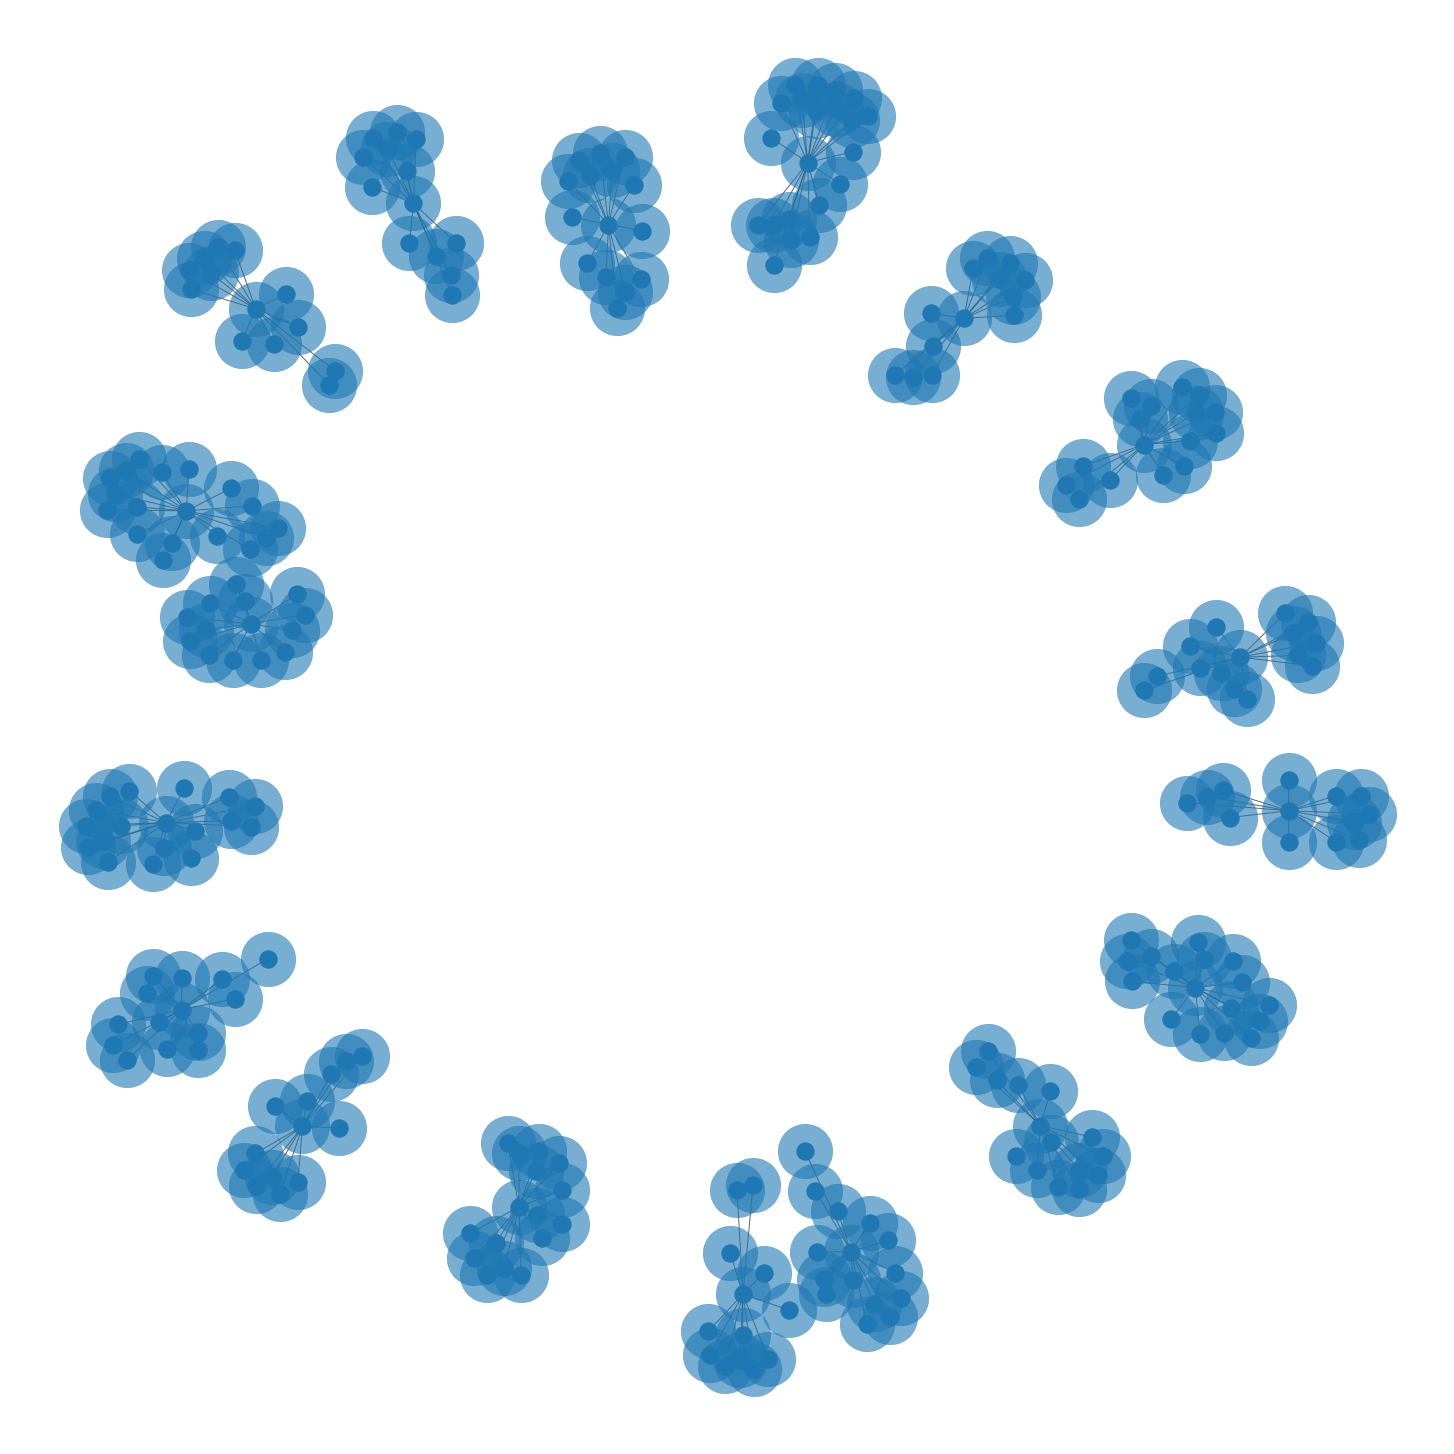

In [11]:
graphClass.graph_viz(graph, 0.1)